In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from matplotlib.pyplot import imshow
import pandas as pd
import seaborn as sb

### Load Data

In [3]:
numcat = 6 #number of categories
categories = ['AbdomenCT', 'BreastMRI', 'ChestCT', 'CXR', 'Hand', 'HeadCT']

In [4]:
# directory = r'./Medical_MNIST/'
# train, test = [], []
# for i in range(numcat):
#     imagearray = []
#     for image_raw in os.listdir(directory + categories[i]):
#         image_np = (np.array(Image.open(os.path.join(directory + categories[i], image_raw))).flatten())
#         image = np.append(image_np, i)
#         imagearray.append(image.astype('uint8'))
#     train += imagearray[0:int(0.8*len(imagearray))]
#     test += imagearray[int(0.8*len(imagearray)):]
# # data = np.array(imagearray)
# train = np.array(train)
# test = np.array(test)


In [5]:
# #saving data for faster loading in future
# np.save('Medical_train.npy', train)
# np.save('Medical_test.npy', test)

In [6]:
# For now we are using only a subset of train and test data
# trainsub = 40000
# testsub = 5000

In [7]:
train = np.load('Medical_train.npy')
test = np.load('Medical_test.npy')
#shuffle train and test sets
np.random.shuffle(train)
np.random.shuffle(test)
#splitting into x and y - for both train and test sets
# X_train, y_train = train[:trainsub, :-1], train[:trainsub, -1]
# X_test, y_test = test[:testsub, :-1], test[:testsub, -1]
X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

In [8]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(47163, 4096) (47163,) (11791, 4096) (11791,)


In [9]:
# directory = r'./Medical_MNIST/'
# image_np = np.array(Image.open(os.path.join(directory + 'AbdomenCT', '000000.jpeg')))
# imshow(image_np/255, cmap = 'gray')
# # img.show()

### Data Visualization(PCA/tSNE)

Learnt the basics of PCA and tSNE from https://www.datacamp.com/community/tutorials/introduction-t-sne.
Code also adapted from the above website only

In [10]:
def medical_scatter(x, colors):
    '''Libraries use for this function ONLY'''
    import matplotlib.patheffects as PathEffects
#     %matplotlib inline

    import seaborn as sns
    '''------------------------------------'''
    
#     sns.set_style('darkgrid')
    sns.set_palette('muted')
    sns.set_context("notebook", font_scale=1.5,
                    rc={"lines.linewidth": 2.5})
    
    '''----------------------------------------'''
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    print('Number of unique classes are = {}'.format(num_classes))
    palette = np.array(sns.color_palette("hls", num_classes))
#     print(palette)
    # create a scatter plot.
    f = plt.figure(figsize=(12, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
#     ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.
        
        xtext, ytext = np.median(x[colors == i, :], axis=0)
#         print(i, xtext, ytext)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

### PCA - on full train dataset

In [11]:
# '''The following libraries used only for PCA/tSNE as we are allowed to do so'''
# from sklearn.decomposition import PCA
# import time 

# time_start = time.time()

# pca = PCA(n_components=4)
# pca_result = pca.fit_transform(X_train)

# print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

__Performing the pca, we see that 58 percent of the variance in data is explained by two principle axis only__

In [12]:
# pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

# pca_df['pca1'] = pca_result[:,0]
# pca_df['pca2'] = pca_result[:,1]
# pca_df['pca3'] = pca_result[:,2]
# pca_df['pca4'] = pca_result[:,3]

# print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

__visualization__

In [13]:
# top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

# medical_scatter(top_two_comp.values,y_train) # Visualizing the PCA output

### tSNE

In [14]:
# #using a subset of the train data
# x_subset = X_train
# y_subset = y_train
# # x_subset = X_train[0:10000]
# # y_subset = y_train[0:10000]
# print(y_subset.shape)
# print(np.unique(y_subset))

In [15]:
# '''The following libraries used only for PCA/tSNE as we are allowed to do so'''
# from sklearn.manifold import TSNE
# import time
# time_start = time.time()

# medical_tsne = TSNE(random_state=2).fit_transform(x_subset)

# print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [16]:
# medical_scatter(medical_tsne, y_subset)

In [17]:
# print(medical_tsne.shape)

# Strategy 1: PCA
### Do PCA on full dataset (X_train + X_test combined) and get result in low dimension. Then on the obtained features carry out all algorithms like bayes, naive bayes etc etc

In [18]:
'''The following libraries used only for PCA/tSNE as we are allowed to do so'''
from sklearn.decomposition import PCA
import time 

time_start = time.time()

pca = PCA(n_components=4)
# print(X_train.shape)
# assert(np.concatenate((X_train,X_test), axis = 0).shape == (X_test.shape[0]+X_train.shape[0], X_test.shape[1]))
pca_result = pca.fit_transform(X_train)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 133.0872654914856 seconds


In [19]:
print(pca_result.shape)
print(pca_result[0:10])

(47163, 4)
[[ 2755.93374    -2036.1581099   -555.60375177 -1470.25744656]
 [-2775.42102574    77.82511766  1059.05970298   150.83451041]
 [-2461.84544594 -2515.57966562   -75.80075227   743.20548063]
 [ 2293.33474064  1344.92478291   380.34371734   661.75400219]
 [ 2423.5935719   1237.14102174   446.368521     630.4491896 ]
 [ 3740.71216432 -1755.44721928  -746.30735654 -1949.25275623]
 [-4215.99301646  1797.66436681 -1327.81696914  -895.29562619]
 [ 3721.14687881 -1519.22754786 -2204.52454226 -1177.13734506]
 [ 5290.00893041  -771.03164431  -574.93025493   -97.30987277]
 [ -240.64038441 -2795.21692847 -1945.98186992 -1375.41557191]]


In [20]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.46913582 0.11218636 0.05130604 0.03566176]


In [21]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component
#apply the pca transform to the test data

test_pca = pca.transform(X_test)

#we are doing it for 2 pca components only currently
#we will also normalize the data to make mean 0 and std 1 for the columns

def normalize(x):
    return (x-x.mean(axis = 0))/(x.std(axis = 0))

X_train_pca = normalize(top_two_comp.values)
X_test_pca = normalize(test_pca[:,[0,1]])

#NOTE:Y_train and y_test remain same as before
print(X_train_pca.shape, X_test_pca.shape, y_train.shape, y_test.shape)
# print(X_train_pca[0:10])

(47163, 2) (11791, 2) (47163,) (11791,)


Number of unique classes are = 6


(<Figure size 864x864 with 1 Axes>,
 [Text(1230.238266313424, 1053.181523878564, '0'),
  Text(-4328.753079570714, 1206.0462135334133, '1'),
  Text(2433.800936786586, 1357.6072545343723, '2'),
  Text(3944.603257080893, -1276.4744955617598, '3'),
  Text(-1991.8216056746942, -2440.965518822443, '4'),
  Text(-2220.363418434155, -77.02381745163154, '5')])

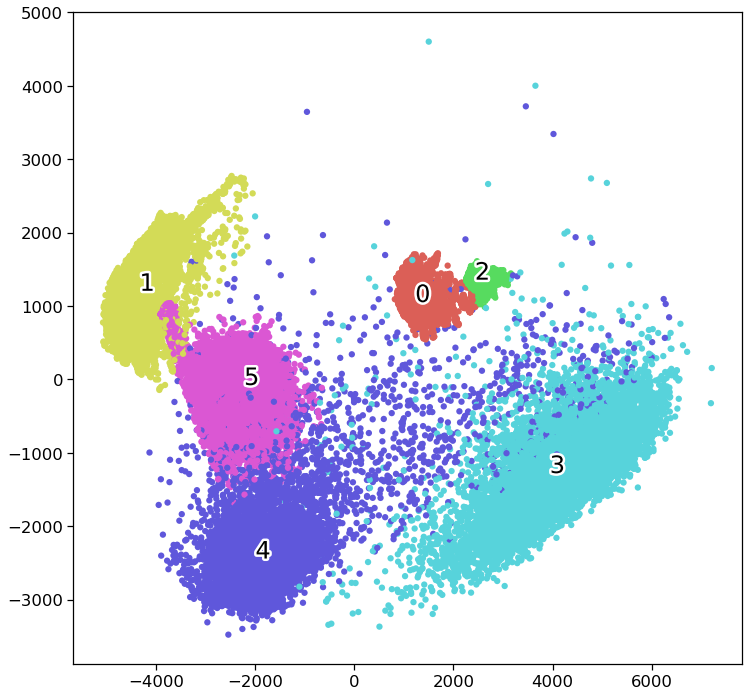

In [22]:
medical_scatter(top_two_comp.values,y_train) # Visualizing the PCA outputa

In the above plots we se that the different classes are separating quite nicely which makes us believe that the 
accuracies of common algorithms, like bayes, naive bayes etc with gaussians as ccd shoudl be good if the gaussian will be able to model wach class. on pca data

# Naive Bayes Classifier on PCA data - with Gaussian or some other density functions as density estimates of individual features for a particular class

### MLE

In [35]:
def get_naive_params(X, y):
    params = []
    for i in range(numcat):
        mu = np.mean(X[np.where(y == i)], axis = 0)
        var = np.var(X[np.where(y == i)], axis = 0)
#         print(mu.shape, var.shape)
        assert(mu.shape == var.shape and mu.shape == (X.shape[1],))
        params.append({'mu':mu, 'var':var})
    return params

def performance_metrics_multiclass(y_pred_test, y_test, num_class):
    '''gives the TPR, FPR, acc, precision, recall and F1 score for all classes by comparing the 2 input arrays'''
    #First we calculate the confusion matrix of size num_class*num_class
    #NOTE: Y axis of matrix will be predicted class and x axis wll be true class
    conf_mat = np.zeros((num_class, num_class))
    
    for i in range(num_class):
        for j in range(num_class):
            conf_mat[i, j] = np.logical_and(y_pred_test == i, y_test ==j).sum()
    # Calculating precision, recall, F1 Score for each class
    colnames = ['class', 'Precision', 'Recall', 'F1']
    df = pd.DataFrame(columns = colnames)
    for i in range(num_class):
        TP = conf_mat[i, i]
        FP = conf_mat[i].sum() - conf_mat[i, i]
        TN = conf_mat.sum() - conf_mat[i].sum() - conf_mat[:, i].sum() +  conf_mat[i, i]
        FN = conf_mat[:, i].sum() - conf_mat[i, i]
        P = (TP)/(TP+FP)
        R = (TP)/(TP+FN)
        F1 = 2*P*R/(P+R)
        df = df.append({'class':categories[i], 'Precision':P, 'Recall':R, 'F1':F1 }, ignore_index = True)
    macroF1 = df['F1'].mean()
    accuracy = (y_pred_test==y_test).mean()
    
    # NOTE : returning the transpose of the confusion matricx to get true labels on the y axis
    conf_mat = conf_mat.T
    # NORMALIZING the confusion matrix
    conf_mat = np.around(conf_mat/(conf_mat.sum(axis = 1)), decimals = 3)
    
    
    #PLot the matrix
    ax = sb.heatmap(conf_mat, vmin = 0, vmax = 1, cmap = sb.light_palette("seagreen", as_cmap=True), xticklabels = categories, yticklabels = categories, annot = True, annot_kws={"size": 12})
#     ax.figure.axes[-1].yaxis.label.set_size(12)
    plt.xlabel('Predicted Labels', fontsize = 14)
    plt.ylabel('True Labels', fontsize = 14)
    plt.tick_params(axis='both', labelsize=10)
    plt.show()
    return conf_mat, df, macroF1, accuracy

def getpriors(y_train):
#     priors = [X_train_0.shape[0]/(X_train_1.shape[0] + X_train_0.shape[0]), X_train_1.shape[0]/(X_train_1.shape[0] + X_train_0.shape[0])]
    priors = [(y_train==i).sum()/y_train.shape[0] for i in range(6)]
        
    return priors

def gaussian_univariate(x, mu, var):
    """ to get the value of pdf having scalar params mu and var, @x """
    diff = (x - mu)
    pdf_x = (1/(np.sqrt(2*np.pi)))* (1/np.sqrt(var)) * (np.exp(-0.5*(diff**2)/(var)))
    return pdf_x.item()

def naive_likelihood(x, mu_array, var_array):
    '''mu_array, and var_array are d dimensional array where d is the size of x which is the number of features'''
    likelihood = 1
    for i in range(x.shape[0]):
        likelihood = likelihood * gaussian_univariate(x[i], mu_array[i], var_array[i])
    
    return likelihood
        
def predict_naive(X_test, priors, naive_params):
    y_pred_test = np.zeros((X_test.shape[0],))
    for i in range(X_test.shape[0]):
        maxpost = 0
        for j in range(numcat):
            assert(X_test[i].shape == (X_test.shape[1],))
            lik = naive_likelihood(X_test[i], naive_params[j]['mu'], naive_params[j]['var'])
            post_j = priors[j]*lik
            if(post_j>maxpost):
                maxpost = post_j
                y_pred_test[i] = j
    return y_pred_test

In [126]:
# print((y_test<=6).sum())
# print(np.where(X_test_pca[:,0]>=0))

## Cross Validating Naive Bayes
we finally need, 
1. 5 fold cross validation train and test( should be validation) accuracies.
2. confusion maatrix for 80percent train and 20 percent test data - and get per class precision recall and F1 and finally macro F1

In [131]:
def cross_validate_naivebayes(X_train, y_train ,k): 
    #data is already shuffled before so no need to do that again
    
    #Kfoldsplit is a list of k (almost) equal sized parts of the np array
    Kfoldsplit_X = np.array_split(X_train, k, axis = 0)
    Kfoldsplit_y = np.array_split(y_train, k, axis = 0)
    
    #Use test_score and train_score to store the metric you want to analyse i.e. accuracy, precision, 
    cv_train_accuracy = 0  
    cv_valid_accuracy = 0
    for i in range(k):
        #make train and validation sets
        valid_X, valid_y = Kfoldsplit_X[i], Kfoldsplit_y[i]
        train_X, train_y = np.concatenate(Kfoldsplit_X[:i]+Kfoldsplit_X[i+1:], axis = 0), np.concatenate(Kfoldsplit_y[:i]+Kfoldsplit_y[i+1:], axis = 0)
        #training phase
        priors_naive = getpriors(train_y)
        naive_params = get_naive_params(train_X, train_y)
        
        #validation stats
        y_pred_valid_naive = predict_naive(valid_X, priors_naive, naive_params)
        conf_mat, stats_df, macroF1, accuracy_valid = performance_metrics_multiclass(y_pred_valid_naive, valid_y, numcat)
        
        #train stats
        y_pred_train_naive = predict_naive(train_X, priors_naive, naive_params)
        conf_mat, stats_df, macroF1, accuracy_train = performance_metrics_multiclass(y_pred_train_naive, train_y, numcat)
        
        cv_train_accuracy += accuracy_train   
        cv_valid_accuracy += accuracy_valid
    print('Cross Validation train accuracy = {}, test accuracy = {}'.format(cv_train_accuracy/k, cv_valid_accuracy/k))        
    return cv_train_accuracy/k, cv_valid_accuracy/k

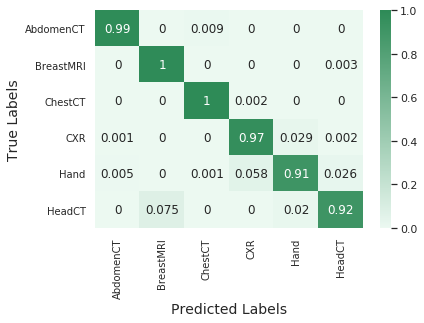

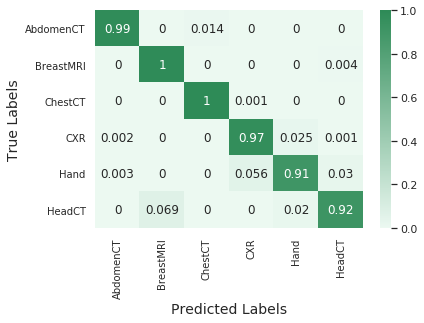

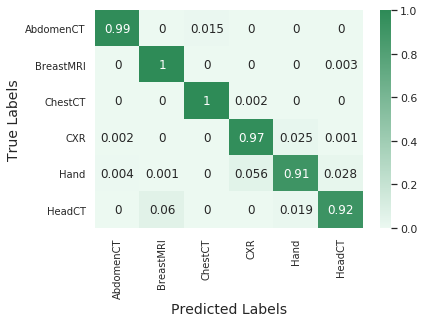

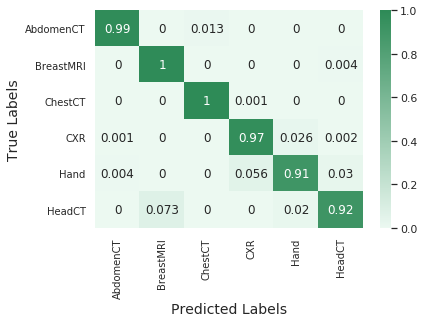

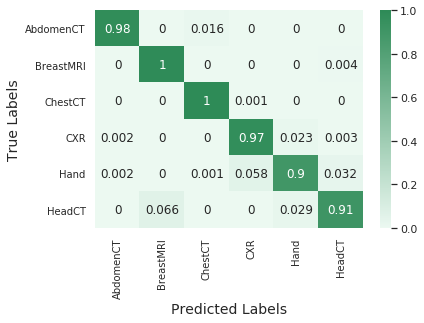

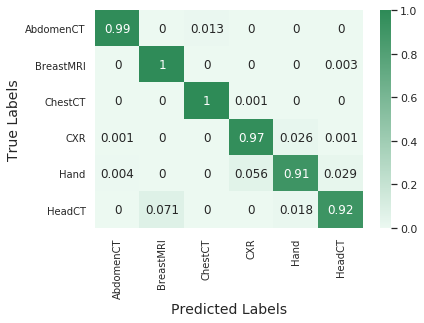

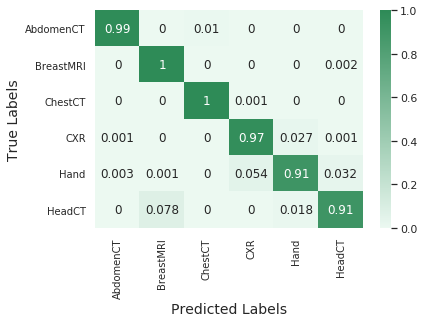

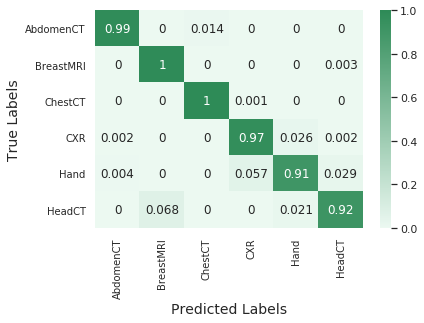

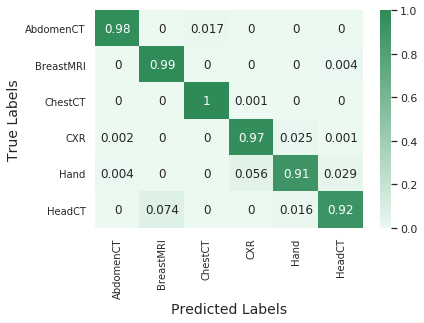

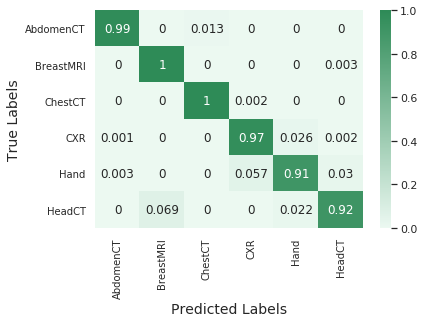

Cross Validation train accuracy = 0.9627462219247679, test accuracy = 0.9626190092763508


(0.9627462219247679, 0.9626190092763508)

In [132]:
cross_validate_naivebayes(X_train_pca, y_train, 5)

## Testing for Naive Bayes

In [135]:
priors_naive = getpriors(y_train)
naive_params = get_naive_params(X_train_pca, y_train)

Test data Stats


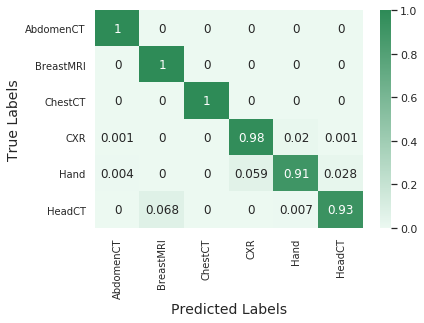

Macro F1 = 0.9690688263572058, Accuracy = 0.969298617589687
       class  Precision  Recall        F1
0  AbdomenCT   0.995025  1.0000  0.997506
1  BreastMRI   0.936715  1.0000  0.967324
2    ChestCT   0.999500  1.0000  0.999750
3        CXR   0.943078  0.9775  0.959980
4       Hand   0.970635  0.9090  0.938807
5     HeadCT   0.970343  0.9325  0.951045

 Train data Stats


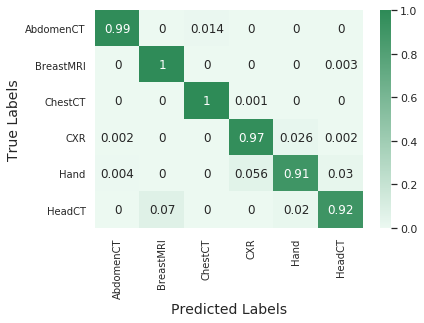

Macro F1 = 0.9625134685445712, Accuracy = 0.9627038144308038
       class  Precision    Recall        F1
0  AbdomenCT   0.994832  0.986500  0.990648
1  BreastMRI   0.934040  0.996370  0.964199
2    ChestCT   0.986420  0.998750  0.992547
3        CXR   0.943979  0.971000  0.957299
4       Hand   0.951883  0.910000  0.930470
5     HeadCT   0.963873  0.917125  0.939918


In [167]:
print('Test data Stats')
y_pred_test_naive = predict_naive(X_test_pca, priors_naive, naive_params)
conf_mat, stats_df, macroF1, accuracy = performance_metrics_multiclass(y_pred_test_naive, y_test, numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1, accuracy))
print(stats_df)

print('\n Train data Stats')
y_pred_train_naive = predict_naive(X_train_pca, priors_naive, naive_params)
conf_mat, stats_df, macroF1, accuracy = performance_metrics_multiclass(y_pred_train_naive, y_train, numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1, accuracy))
print(stats_df)

### MAP

# Bayes Classifier - with (multivariate) Gaussian as class conditional densities

TODO : 1.MLE, 2.MAP

### MLE: 

In [139]:
def gaussian_multivariate(x, mu, sigma):
    """ to get the value of pdf having params mu and sigma, @x """
    dim = len(x)
    diff = (x - mu).reshape((-1,1))
    pdf_x = (1/((np.sqrt(2*np.pi))**dim))* (1/np.sqrt(np.linalg.det(sigma))) * (np.exp(-0.5*(diff.T).dot(np.linalg.inv(sigma).dot(diff))))
    return pdf_x.item()

def get_normal(X, y):
    params = []
    for i in range(numcat):
        mu = np.mean(X[np.where(y == i)], axis = 0)
        sigma = np.cov(X[np.where(y == i)].T)
        params.append({'mu':mu, 'sigma':sigma})
    return params
    
def predict_normal(X_test, priors, norm_params):
    y_pred_test = np.zeros((X_test.shape[0],))
    for i in range(X_test.shape[0]):
        maxpost = 0
        for j in range(numcat):
            lik =  gaussian_multivariate(X_test[i], norm_params[j]['mu'], norm_params[j]['sigma'])
            post_j = priors[j]*lik
            if(post_j>maxpost):
                maxpost = post_j
                y_pred_test[i] = j
    return y_pred_test

## Cross Validating Bayes
we finally need, 
1. 5 fold cross validation train and test( should be validation) accuracies.
2. confusion maatrix for 80percent train and 20 percent test data - and get per class precision recall and F1 and finally macro F1

In [140]:
def cross_validate_bayes(X_train, y_train ,k): 
    #data is already shuffled before so no need to do that again
    
    #Kfoldsplit is a list of k (almost) equal sized parts of the np array
    Kfoldsplit_X = np.array_split(X_train, k, axis = 0)
    Kfoldsplit_y = np.array_split(y_train, k, axis = 0)
    
    #Use test_score and train_score to store the metric you want to analyse i.e. accuracy, precision, 
    cv_train_accuracy = 0  
    cv_valid_accuracy = 0
    for i in range(k):
        #make train and validation sets
        valid_X, valid_y = Kfoldsplit_X[i], Kfoldsplit_y[i]
        train_X, train_y = np.concatenate(Kfoldsplit_X[:i]+Kfoldsplit_X[i+1:], axis = 0), np.concatenate(Kfoldsplit_y[:i]+Kfoldsplit_y[i+1:], axis = 0)
        #training phase
        priors_multivariate =  getpriors(train_y)
        norm_params = get_normal(train_X, train_y)
        
        #validation stats
        y_pred_valid_normal = predict_normal(valid_X, priors_multivariate, norm_params)
        conf_mat, stats_df, macroF1, accuracy_valid = performance_metrics_multiclass(y_pred_valid_normal, valid_y, numcat)
        
        #train stats
        y_pred_train_normal = predict_normal(train_X, priors_multivariate, norm_params)
        conf_mat, stats_df, macroF1, accuracy_train = performance_metrics_multiclass(y_pred_train_normal, train_y, numcat)
        
        cv_train_accuracy += accuracy_train   
        cv_valid_accuracy += accuracy_valid
    print('Cross Validation train accuracy = {}, test accuracy = {}'.format(cv_train_accuracy/k, cv_valid_accuracy/k))        
    return cv_train_accuracy/k, cv_valid_accuracy/k

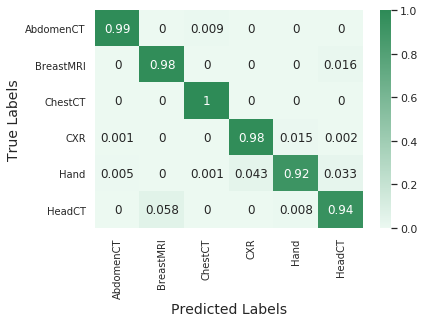

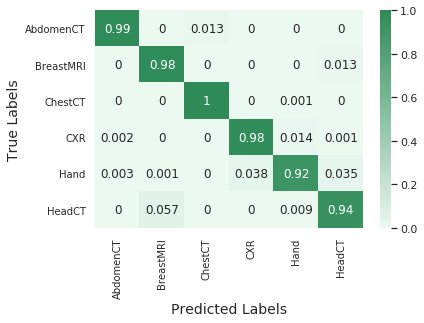

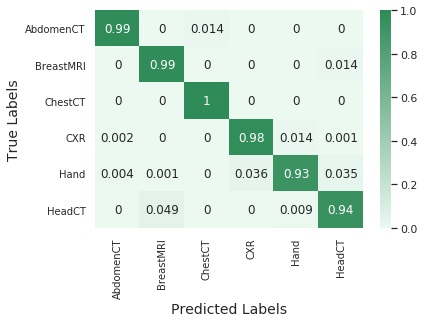

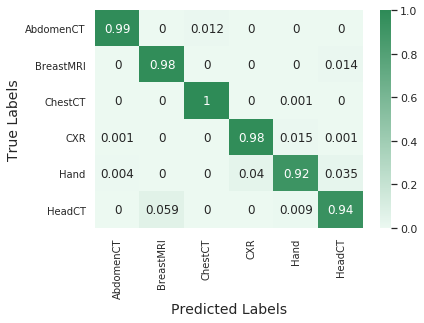

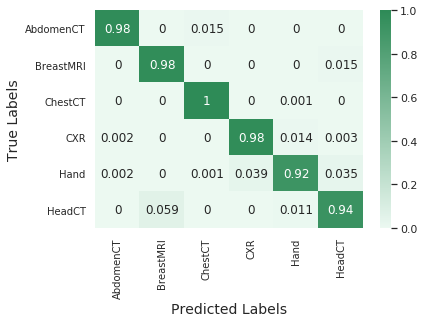

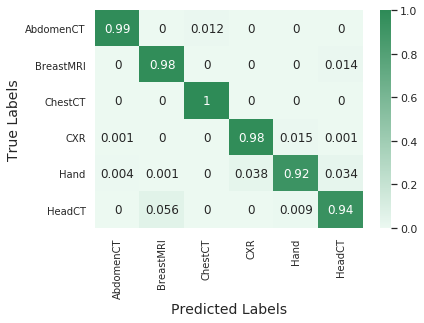

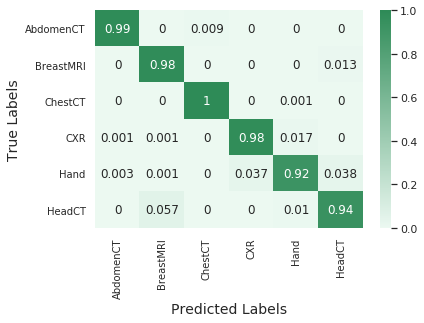

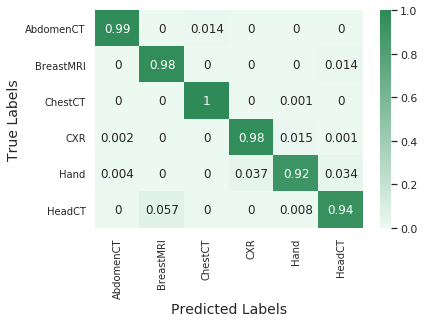

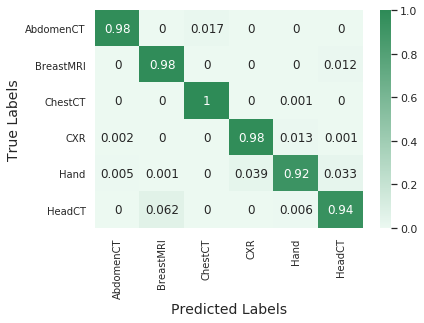

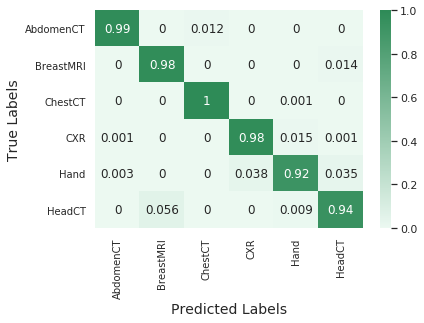

Cross Validation train accuracy = 0.969085935189107, test accuracy = 0.9691707517695219


(0.969085935189107, 0.9691707517695219)

In [141]:
cross_validate_bayes(X_train_pca, y_train, 5)

## Testing Bayes

In [142]:
priors_multivariate =  getpriors(y_train)
norm_params = get_normal(X_train_pca, y_train)

Test Data Stats


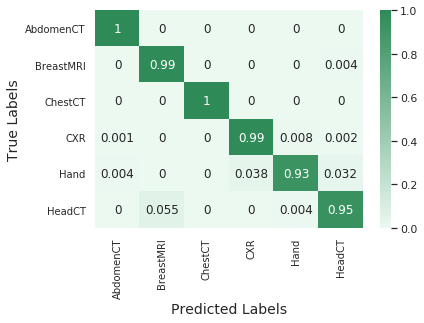

Macro F1 = 0.9755298609296794, Accuracy = 0.9757442116868799
       class  Precision    Recall        F1
0  AbdomenCT   0.995520  1.000000  0.997755
1  BreastMRI   0.947368  0.994975  0.970588
2    ChestCT   0.999500  1.000000  0.999750
3        CXR   0.963017  0.989500  0.976079
4       Hand   0.986681  0.926000  0.955378
5     HeadCT   0.961382  0.946000  0.953629

Train Data Stats


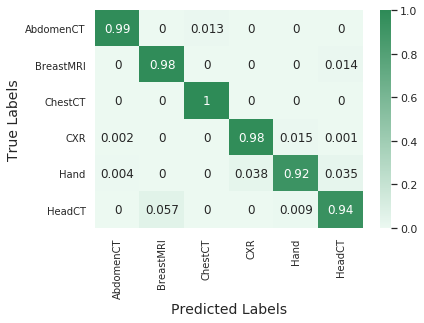

Macro F1 = 0.9689683174913909, Accuracy = 0.9691707482560482
       class  Precision    Recall        F1
0  AbdomenCT   0.994710  0.987250  0.990966
1  BreastMRI   0.944802  0.984504  0.964244
2    ChestCT   0.987160  0.999500  0.993292
3        CXR   0.962292  0.982500  0.972291
4       Hand   0.974898  0.922375  0.947909
5     HeadCT   0.949760  0.940500  0.945107


In [166]:
print('Test Data Stats')
y_pred_test_normal = predict_normal(X_test_pca, priors_multivariate, norm_params)
conf_mat_norm, stats_df_norm, macroF1_norm, accuracy_norm = performance_metrics_multiclass(y_pred_test_normal, y_test, numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm, accuracy_norm))
print(stats_df_norm)

print('\nTrain Data Stats')
y_pred_train_normal = predict_normal(X_train_pca, priors_multivariate, norm_params)
conf_mat_norm, stats_df_norm, macroF1_norm, accuracy_norm = performance_metrics_multiclass(y_pred_train_normal, y_train, numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm, accuracy_norm))
print(stats_df_norm)


# Bayes Classifier - with GMM as class conditional densities

### Useful functions (EM algorithm and other functions for support)

In [161]:
# Fro this we will use a subset of dataset to make it computationally tractable
n = 25
X_train_gmm = X_train_pca[0:X_train_pca.shape[0]//n]
y_train_gmm = y_train[0:X_train_pca.shape[0]//n]
# X_test_gmm = X_test_pca[0:X_test_pca.shape[0]//n]
# y_test_gmm = y_test[0:X_test_pca.shape[0]//n]

In [155]:
def random_params(k, data):
    pi = np.ones(k)*(1.0/k)
    cols = data.shape[1]
    mu = np.zeros((k, cols))    #mean of k clusters
    for k_ in range(k):
        randnum = np.floor(np.random.random()*len(data))
        for col in range(cols):
            mu[k_][col] += (data[int(randnum)][col])
    
    sigma = []
    #Initializing sigma as covariance of data only for all gaussians
    for i in range(k):
        sigma.append(np.cov(data.T))
    sigma = np.array(sigma)
    
    return pi, mu, sigma


def likelihood(x, pi, mu, sigma, k):
    sum = 0.
    for k_ in range(k):
        sum += pi[k_]*gaussian_multivariate(x, mu[k_], sigma[k_])
    
    return sum.item()

                
def Estep(pi, mu, sigma, k, data):
    N = data.shape[0]
    mem_wts = np.zeros((N, k))
    #storing member weights in an N*k matrix
    for k_ in range(k):
        for n in range(N):
            mem_wts[n,k_] = pi[k_]*gaussian_multivariate(data[n], mu[k_], sigma[k_])/(likelihood(data[n], pi, mu, sigma, k))      
                
    return mem_wts

def Mstep(mem_wts, k, data):
    N = data.shape[0]
    columns = data.shape[1]    
    mu = np.zeros((k, columns))
    sigma = np.zeros((k, columns, columns))
    pi = np.zeros(k)
    for k_ in range(k):
        mem_wts_k_ = mem_wts[:,k_].reshape(N, 1)
        Nk_ = mem_wts_k_.sum()
        pi[k_] = (Nk_)/N
        mu[k_] = (1/Nk_)*(((mem_wts_k_.T).dot(data)).sum(axis=0))
    
    for k_ in range(k):
        mem_wts_k_ = mem_wts[:,k_].reshape(N, 1)
        Nk_ = mem_wts_k_.sum()
        for n in range(N):
            diff = (data[n] - mu[k_]).reshape((-1,1))
            sigma[k_] += (mem_wts_k_[n,0])*(diff.dot(diff.T))
        sigma[k_] /= Nk_
        assert(sigma[k_].shape==(columns,columns))
                
    return pi, mu, sigma

def log_lik(pi, mu, sigma, k, data):
    log_lik = 0.
    
    for n in range(data.shape[0]):
#         print(likelihood(data[n], pi, mu, sigma, k))
        log_lik += np.log(likelihood(data[n], pi, mu, sigma, k))
    return log_lik

def EM(data, k, thresh, iter_max):
#     initialize array - pi, mu, sigmas having parameters for all the gaussians (k in number)
#     print(data[1].shape)
    pi, mu, sigma = random_params(k, data)
    log_lik_list = []
    log_lik_curr = log_lik(pi, mu, sigma, k, data)
    
    for i in range(iter_max):
        log_lik_list.append(log_lik_curr)
        if(i%10 == 0):
            print("iteration     |    {}    |     LogLikelihood = {}".format(i, log_lik_curr))
        mem_wts = Estep(pi, mu, sigma, k, data) #membership weights calculated in the E step
        pi, mu, sigma = Mstep(mem_wts, k, data) #used the membership weights to get new pi, mu, sigma
        
        #calculate new log likelihood
        log_lik_new = log_lik(pi, mu, sigma, k, data)
        
#         check if model has converged
        if(abs(log_lik_new-log_lik_curr) < thresh):
            break
        
        #update log likelihood
        log_lik_curr = log_lik_new
    
    print("EM completed")
    plt.plot(log_lik_list)
    plt.ylabel('Log_Likelihood')
    plt.xlabel('Iterations')
    plt.title('Log_likelihood vs number of iterations in EM algorithm')
    plt.show()
    print('Final log likelihood = {}'.format(log_lik_curr))
    return {'pi':pi, 'mu':mu, 'sigma':sigma}

def prediction_gmm(X_test, priors, gmm_params, num_gauss):
    y_pred_test = np.zeros((X_test.shape[0],))
#     print(thresh)
    for i in range(X_test.shape[0]):
        maxpost = 0
        for j in range(numcat):
            lik = likelihood(X_test[i], gmm_params[j]['pi'], gmm_params[j]['mu'], gmm_params[j]['sigma'], num_gauss)
            post_j = priors[j]*lik
            if(post_j>maxpost):
                maxpost = post_j
                y_pred_test[i] = j            
    return y_pred_test

def get_gmm_params(X_train, y_train, num_gauss, iter_max, stop_thresh):
    '''Function that takes input hyperparameters, along with training data to give out the parameters for GMM'''
    gmm_params = []
    for i in range(numcat):
        gmm_params_i = EM(X_train[np.where(y_train==i)], num_gauss, stop_thresh, iter_max)
        gmm_params.append(gmm_params_i)
    
    return gmm_params

### Bias Variance curve for selecting ideal number of gaussians
Overfitting GMM by increasing number of gaussians. Plot the bias variance curves
Note: the code will take time to run

In [179]:
train_acc_list = []
valid_acc_list = []

iteration     |    0    |     LogLikelihood = 300.31237587632353
EM completed


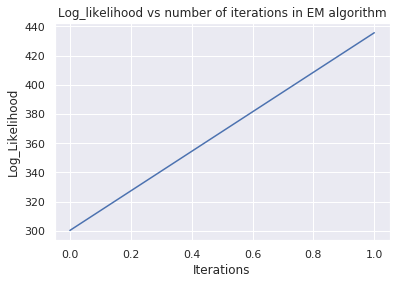

Final log likelihood = 435.64067350464
iteration     |    0    |     LogLikelihood = -101.98215263242992
EM completed


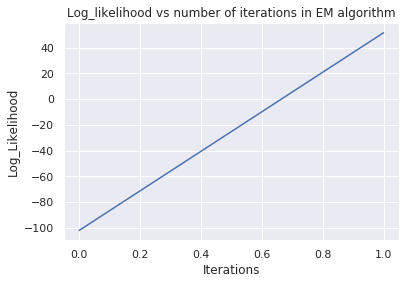

Final log likelihood = 51.49129767563345
iteration     |    0    |     LogLikelihood = 742.1834604668443
EM completed


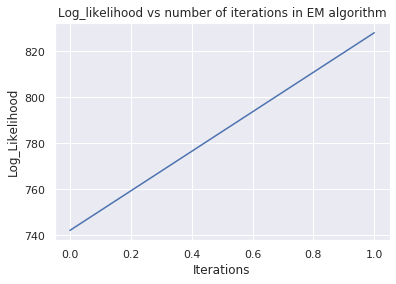

Final log likelihood = 828.1135623176559
iteration     |    0    |     LogLikelihood = -419.26133564925584
EM completed


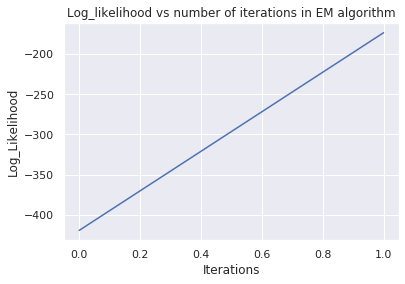

Final log likelihood = -173.64979566945138
iteration     |    0    |     LogLikelihood = -388.7436161716541
EM completed


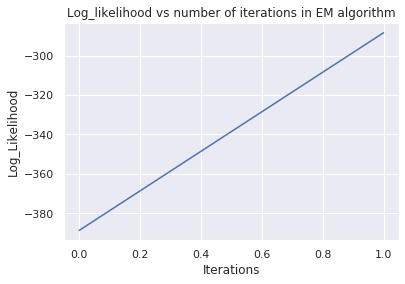

Final log likelihood = -288.4435410504225
iteration     |    0    |     LogLikelihood = -14.904620704594759
EM completed


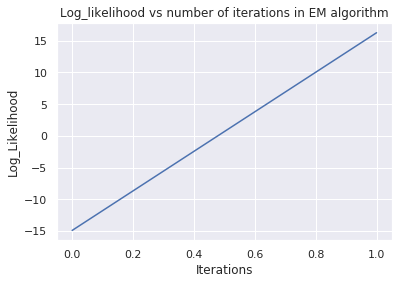

Final log likelihood = 16.26050192674264


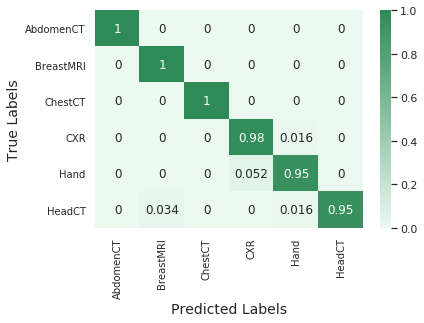

Macro F1 = 0.9807937164117404, Accuracy = 0.9814814814814815


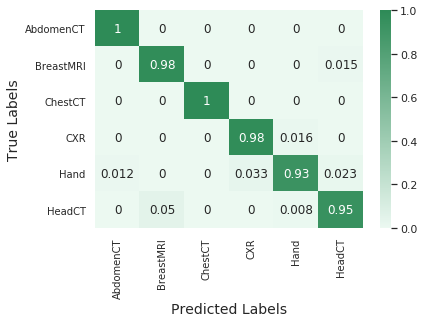

Macro F1 = 0.974060242458482, Accuracy = 0.9741379310344828
iteration     |    0    |     LogLikelihood = 323.8730064268065
iteration     |    10    |     LogLikelihood = 465.49292389261524
iteration     |    20    |     LogLikelihood = 466.3146732559143
iteration     |    30    |     LogLikelihood = 466.76970517664233
iteration     |    40    |     LogLikelihood = 467.04409703859665
iteration     |    50    |     LogLikelihood = 467.1546521035736
iteration     |    60    |     LogLikelihood = 467.1845958254465
iteration     |    70    |     LogLikelihood = 467.1925783407398
iteration     |    80    |     LogLikelihood = 467.19489673727486
EM completed


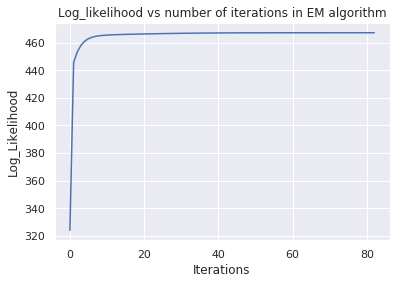

Final log likelihood = 467.1951095327195
iteration     |    0    |     LogLikelihood = -43.17066932861107
iteration     |    10    |     LogLikelihood = 103.6641796289797
iteration     |    20    |     LogLikelihood = 109.30649067690686
iteration     |    30    |     LogLikelihood = 109.81451222527663
iteration     |    40    |     LogLikelihood = 109.85454046831535
EM completed


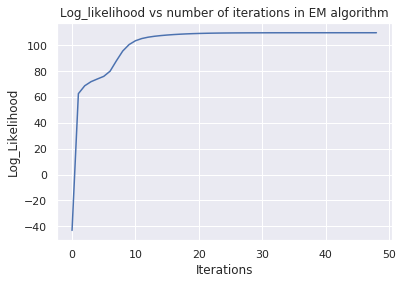

Final log likelihood = 109.85743087681884
iteration     |    0    |     LogLikelihood = 224.67802001460512
iteration     |    10    |     LogLikelihood = 887.4836554451942
iteration     |    20    |     LogLikelihood = 890.0004191777011
iteration     |    30    |     LogLikelihood = 890.3352333379564
iteration     |    40    |     LogLikelihood = 890.4599794781723
iteration     |    50    |     LogLikelihood = 890.4907762797311
iteration     |    60    |     LogLikelihood = 890.4969928506757
EM completed


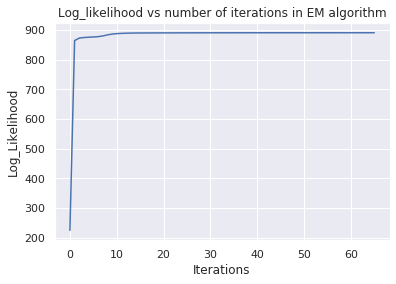

Final log likelihood = 890.4978068110213
iteration     |    0    |     LogLikelihood = -425.76326769066037
iteration     |    10    |     LogLikelihood = -149.50970014587108
iteration     |    20    |     LogLikelihood = -146.9142042822306
iteration     |    30    |     LogLikelihood = -145.2170736256365
iteration     |    40    |     LogLikelihood = -144.91174285714968
iteration     |    50    |     LogLikelihood = -144.84459645991296
iteration     |    60    |     LogLikelihood = -144.8288554820738
iteration     |    70    |     LogLikelihood = -144.82505950818796
EM completed


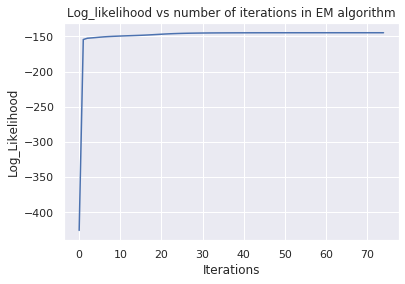

Final log likelihood = -144.82453044624762
iteration     |    0    |     LogLikelihood = -290.66643868842283
iteration     |    10    |     LogLikelihood = -236.07651148485235
iteration     |    20    |     LogLikelihood = -124.8601138848627
iteration     |    30    |     LogLikelihood = -124.19400409224987
EM completed


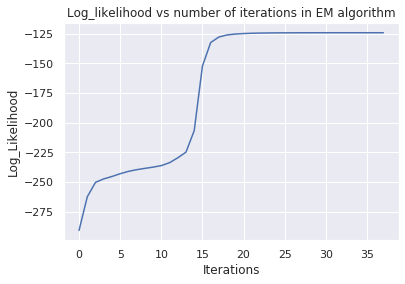

Final log likelihood = -124.18814160285596
iteration     |    0    |     LogLikelihood = -67.78377978896357
iteration     |    10    |     LogLikelihood = 47.19494830369525
iteration     |    20    |     LogLikelihood = 59.41817981669814
iteration     |    30    |     LogLikelihood = 67.04854417477517
iteration     |    40    |     LogLikelihood = 71.57828036699973
iteration     |    50    |     LogLikelihood = 72.42798794256821
EM completed


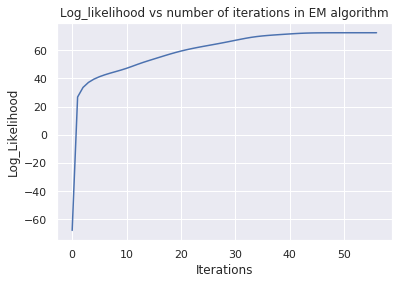

Final log likelihood = 72.4331238404108


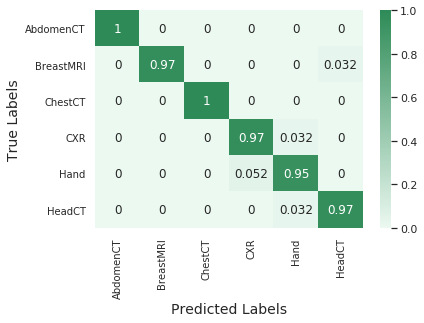

Macro F1 = 0.9754761592722637, Accuracy = 0.9761904761904762


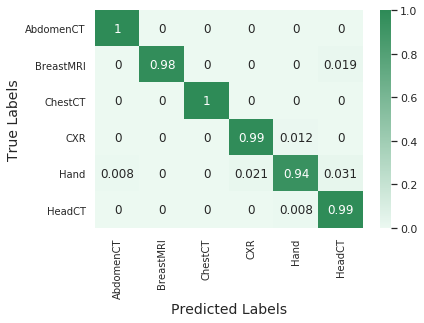

Macro F1 = 0.9835028624570482, Accuracy = 0.98342175066313
iteration     |    0    |     LogLikelihood = 328.8033622619769
iteration     |    10    |     LogLikelihood = 486.0229179486458
iteration     |    20    |     LogLikelihood = 486.69099565847796
iteration     |    30    |     LogLikelihood = 486.7885880650332
iteration     |    40    |     LogLikelihood = 486.8264821552659
iteration     |    50    |     LogLikelihood = 486.84580303577167
iteration     |    60    |     LogLikelihood = 486.8563868750365
iteration     |    70    |     LogLikelihood = 486.86236932510826
iteration     |    80    |     LogLikelihood = 486.8658028436036
iteration     |    90    |     LogLikelihood = 486.86778667676487
EM completed


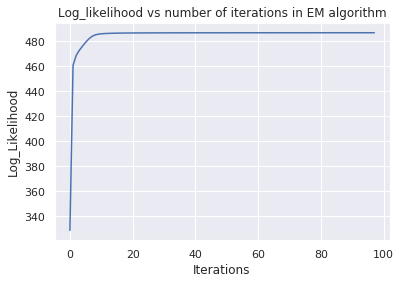

Final log likelihood = 486.86865393016143
iteration     |    0    |     LogLikelihood = -34.256609830434876
iteration     |    10    |     LogLikelihood = 112.25775874545825
iteration     |    20    |     LogLikelihood = 125.37647486269576
iteration     |    30    |     LogLikelihood = 125.44430402076571
iteration     |    40    |     LogLikelihood = 125.4531897975997
EM completed


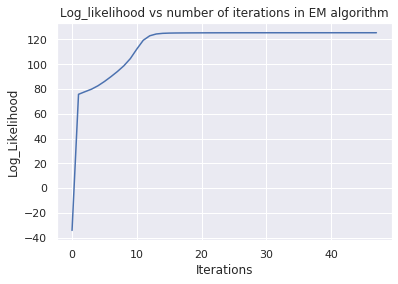

Final log likelihood = 125.45443861341789
iteration     |    0    |     LogLikelihood = 816.8193463874163
iteration     |    10    |     LogLikelihood = 904.5418480615473
iteration     |    20    |     LogLikelihood = 913.7284711265737
iteration     |    30    |     LogLikelihood = 917.467730464645
iteration     |    40    |     LogLikelihood = 917.795663252847
iteration     |    50    |     LogLikelihood = 917.8095288533762
EM completed


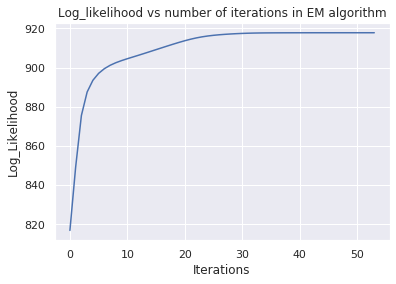

Final log likelihood = 917.8100387833737
iteration     |    0    |     LogLikelihood = -251.23566072731825
iteration     |    10    |     LogLikelihood = -146.3059138362333
iteration     |    20    |     LogLikelihood = -143.37519848304154
iteration     |    30    |     LogLikelihood = -140.505916654453
iteration     |    40    |     LogLikelihood = -137.16822096285404
iteration     |    50    |     LogLikelihood = -135.8809139611394
iteration     |    60    |     LogLikelihood = -135.7229571885963
iteration     |    70    |     LogLikelihood = -135.68611932287666
iteration     |    80    |     LogLikelihood = -135.67640022091513
iteration     |    90    |     LogLikelihood = -135.67361083079444
EM completed


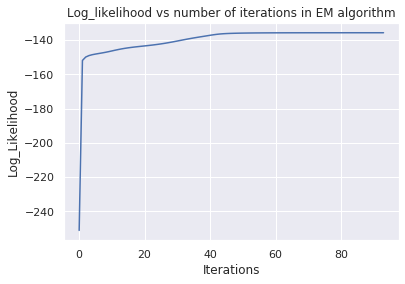

Final log likelihood = -135.67324284191412
iteration     |    0    |     LogLikelihood = -421.41660009046905
iteration     |    10    |     LogLikelihood = -121.51108109889296
iteration     |    20    |     LogLikelihood = -120.5832078605515
iteration     |    30    |     LogLikelihood = -120.47817087149282
iteration     |    40    |     LogLikelihood = -120.4682365650709
iteration     |    50    |     LogLikelihood = -120.46618709721427
iteration     |    60    |     LogLikelihood = -120.46480626699488
iteration     |    70    |     LogLikelihood = -120.46349395929857
iteration     |    80    |     LogLikelihood = -120.46211686490396
iteration     |    90    |     LogLikelihood = -120.46053847445562
EM completed


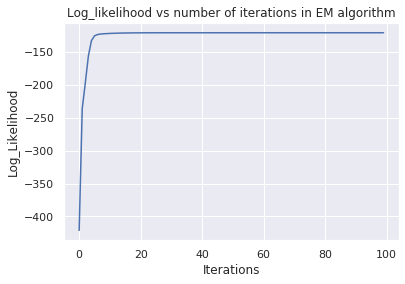

Final log likelihood = -120.45852927736738
iteration     |    0    |     LogLikelihood = -29.97470651613772
iteration     |    10    |     LogLikelihood = 61.4446789749941
iteration     |    20    |     LogLikelihood = 64.21562267460551
iteration     |    30    |     LogLikelihood = 67.30295642351714
iteration     |    40    |     LogLikelihood = 70.60291405641335
iteration     |    50    |     LogLikelihood = 71.39590712670636
iteration     |    60    |     LogLikelihood = 72.05393134006155
iteration     |    70    |     LogLikelihood = 73.28916926606182
iteration     |    80    |     LogLikelihood = 77.24473661073351
iteration     |    90    |     LogLikelihood = 81.98564857779459
EM completed


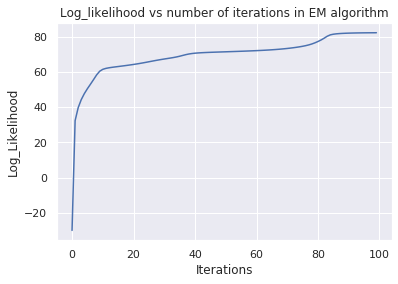

Final log likelihood = 82.21631453377267


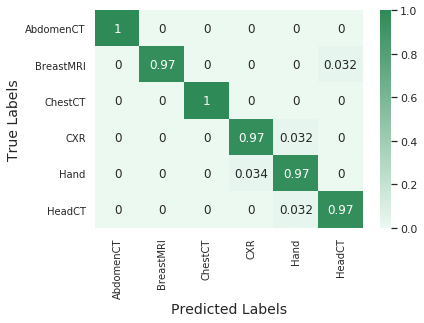

Macro F1 = 0.9782253916640261, Accuracy = 0.9788359788359788


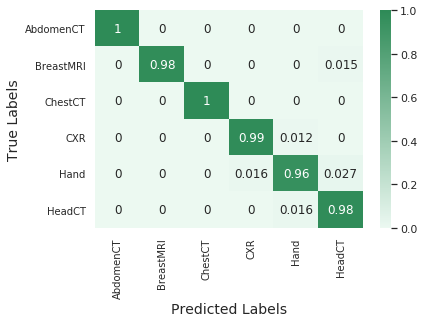

Macro F1 = 0.9855431591248136, Accuracy = 0.9854111405835544
iteration     |    0    |     LogLikelihood = 385.5432055376967
iteration     |    10    |     LogLikelihood = 479.8216771100018
iteration     |    20    |     LogLikelihood = 489.8188589145558
iteration     |    30    |     LogLikelihood = 491.5697952466633
iteration     |    40    |     LogLikelihood = 492.972839732816
iteration     |    50    |     LogLikelihood = 494.0258861130086
iteration     |    60    |     LogLikelihood = 495.13483028425895
iteration     |    70    |     LogLikelihood = 497.6434988836336
iteration     |    80    |     LogLikelihood = 500.1836398769946
iteration     |    90    |     LogLikelihood = 500.4879646091163
EM completed


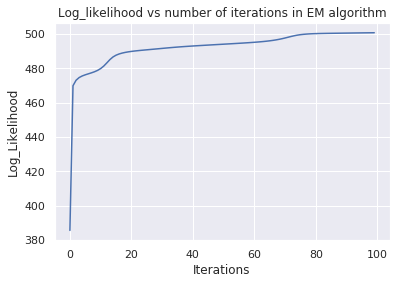

Final log likelihood = 500.7088915052005
iteration     |    0    |     LogLikelihood = -18.259078369397088
iteration     |    10    |     LogLikelihood = 129.539429924686
iteration     |    20    |     LogLikelihood = 131.57493184967512
iteration     |    30    |     LogLikelihood = 133.2593074655632
iteration     |    40    |     LogLikelihood = 136.60300182533433
iteration     |    50    |     LogLikelihood = 138.13102814190057
iteration     |    60    |     LogLikelihood = 138.7359932808059
iteration     |    70    |     LogLikelihood = 139.8023436175606
iteration     |    80    |     LogLikelihood = 140.72897008758022
iteration     |    90    |     LogLikelihood = 141.29244910129123
EM completed


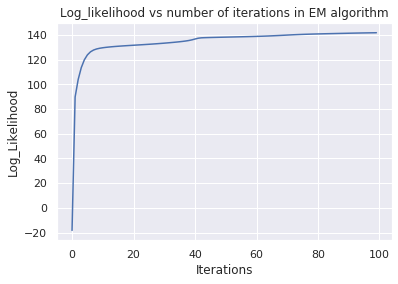

Final log likelihood = 141.71563230916374
iteration     |    0    |     LogLikelihood = 779.5395984501779
iteration     |    10    |     LogLikelihood = 915.1282764028025
iteration     |    20    |     LogLikelihood = 920.4946116575037
iteration     |    30    |     LogLikelihood = 921.9873515338631
iteration     |    40    |     LogLikelihood = 922.4001656264085
iteration     |    50    |     LogLikelihood = 924.3001876788825
iteration     |    60    |     LogLikelihood = 925.7050090099342
iteration     |    70    |     LogLikelihood = 926.3993469315883
iteration     |    80    |     LogLikelihood = 927.5527918899693
iteration     |    90    |     LogLikelihood = 927.8137821142785
EM completed


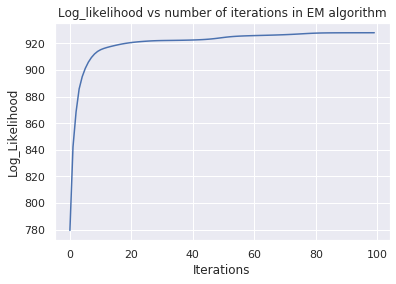

Final log likelihood = 927.8444881544539
iteration     |    0    |     LogLikelihood = -191.88239090130298
iteration     |    10    |     LogLikelihood = -132.74928997076017
iteration     |    20    |     LogLikelihood = -125.80584294343575
iteration     |    30    |     LogLikelihood = -122.26773507473126
iteration     |    40    |     LogLikelihood = -117.85479718482863
iteration     |    50    |     LogLikelihood = -103.81217207001573


/home/harman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/home/harman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/harman/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


iteration     |    60    |     LogLikelihood = nan
iteration     |    70    |     LogLikelihood = nan
iteration     |    80    |     LogLikelihood = nan
iteration     |    90    |     LogLikelihood = nan
EM completed


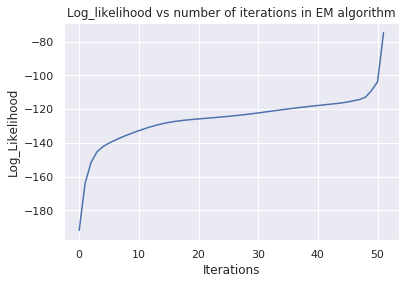

Final log likelihood = nan
iteration     |    0    |     LogLikelihood = -450.5163492714335
iteration     |    10    |     LogLikelihood = -104.06331643468137
iteration     |    20    |     LogLikelihood = -97.63337240973917
iteration     |    30    |     LogLikelihood = -94.92738558592578
iteration     |    40    |     LogLikelihood = -94.25713518549333
iteration     |    50    |     LogLikelihood = -93.8323337923967
iteration     |    60    |     LogLikelihood = -93.56311557362194
iteration     |    70    |     LogLikelihood = -93.4198171310776
iteration     |    80    |     LogLikelihood = -93.34439730488616
iteration     |    90    |     LogLikelihood = -93.30502698954572
EM completed


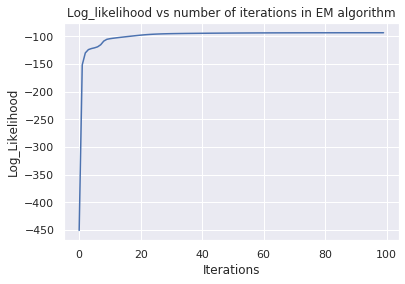

Final log likelihood = -93.28492636432242
iteration     |    0    |     LogLikelihood = -85.12138554876883
iteration     |    10    |     LogLikelihood = 85.96115048758176
iteration     |    20    |     LogLikelihood = 96.11736983563864
iteration     |    30    |     LogLikelihood = 98.91529197015288
iteration     |    40    |     LogLikelihood = 100.10241280817525
iteration     |    50    |     LogLikelihood = 101.107571679639
iteration     |    60    |     LogLikelihood = 101.4323776013504
iteration     |    70    |     LogLikelihood = 101.64616174667367
iteration     |    80    |     LogLikelihood = 101.82394386029718
iteration     |    90    |     LogLikelihood = 101.96747107071131
EM completed


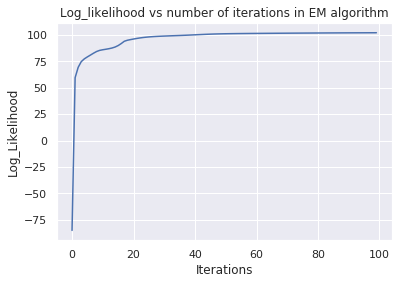

Final log likelihood = 102.07230229460554


/home/harman/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/harman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


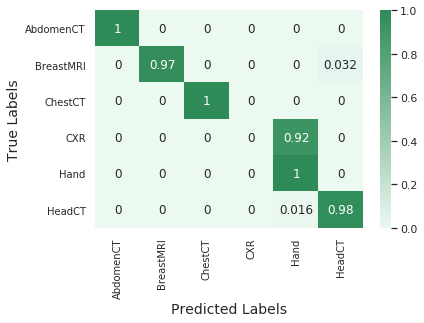

Macro F1 = 0.9279830348375727, Accuracy = 0.8386243386243386


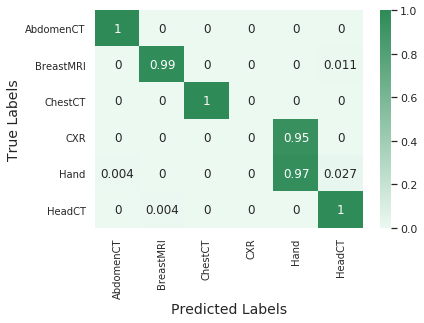

Macro F1 = 0.9264053017039344, Accuracy = 0.8309018567639257
iteration     |    0    |     LogLikelihood = 389.60329276570485
iteration     |    10    |     LogLikelihood = 475.9645644306622
iteration     |    20    |     LogLikelihood = 490.31593954134456
iteration     |    30    |     LogLikelihood = 493.7111556720344
iteration     |    40    |     LogLikelihood = 496.71051890891704
iteration     |    50    |     LogLikelihood = 499.85364106827285
iteration     |    60    |     LogLikelihood = 500.22757611265337
iteration     |    70    |     LogLikelihood = 500.4358283498265
iteration     |    80    |     LogLikelihood = 500.6971789642559
iteration     |    90    |     LogLikelihood = 501.0455457829254
EM completed


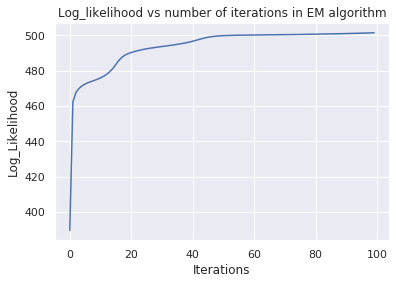

Final log likelihood = 501.56441057553917
iteration     |    0    |     LogLikelihood = -3.5509703534152655
iteration     |    10    |     LogLikelihood = 132.12409129964442
iteration     |    20    |     LogLikelihood = 137.97858404455266
iteration     |    30    |     LogLikelihood = 144.47174037502285
iteration     |    40    |     LogLikelihood = 148.51621937612
iteration     |    50    |     LogLikelihood = 150.31412520996042
iteration     |    60    |     LogLikelihood = 151.02245350313478
iteration     |    70    |     LogLikelihood = 151.58889579303832
iteration     |    80    |     LogLikelihood = 151.66225432061833
iteration     |    90    |     LogLikelihood = 151.70089499402556
EM completed


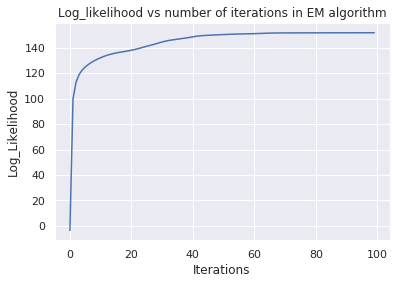

Final log likelihood = 151.726508907001
iteration     |    0    |     LogLikelihood = 782.5159583171177
iteration     |    10    |     LogLikelihood = 923.1497700927287
iteration     |    20    |     LogLikelihood = 925.1085598228889
iteration     |    30    |     LogLikelihood = 926.9652453260447
iteration     |    40    |     LogLikelihood = 928.6512920406182
iteration     |    50    |     LogLikelihood = 929.8110888755808
iteration     |    60    |     LogLikelihood = 930.7664083100678
iteration     |    70    |     LogLikelihood = 931.0653272904394
iteration     |    80    |     LogLikelihood = 931.1829153637638
iteration     |    90    |     LogLikelihood = 931.2730938674254
EM completed


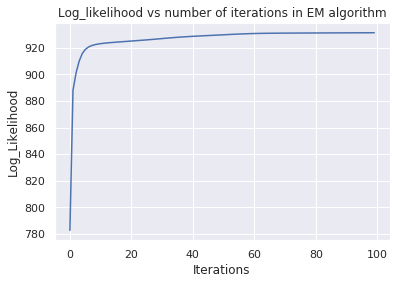

Final log likelihood = 931.355495852064
iteration     |    0    |     LogLikelihood = -205.31730995334627


KeyboardInterrupt: 

In [177]:
#We will nto cross validate due to large time in running gmm, 
#rather we will use just one validation and one train set to get the curve
X_bv_train = X_train_gmm[0:(X_train_gmm.shape[0]*4)//5]
y_bv_train = y_train_gmm[0:(X_train_gmm.shape[0]*4)//5]
X_bv_valid = X_train_gmm[(X_train_gmm.shape[0]*4)//5:]
y_bv_valid = y_train_gmm[(X_train_gmm.shape[0]*4)//5:]

for num_gaussians in [1, 2, 3]:
    print('Doing EM for {} gaussians'.format(num_gaussians))
    gmm_params = get_gmm_params(X_bv_train, y_bv_train, num_gauss = num_gaussians, iter_max = 100, stop_thresh = 0.0001)
    priors = priors_naive = getpriors(y_bv_train)
    
    # for validation data
    y_pred_valid_gmm = prediction_gmm(X_bv_valid, priors, gmm_params, num_gaussians)
    conf_mat_norm_gmm, stats_df_norm_gmm, macroF1_norm_gmm, accuracy_norm_gmm = performance_metrics_multiclass(y_pred_valid_gmm, y_bv_valid, numcat)
    print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_gmm, accuracy_norm_gmm))
    stats_df_norm_gmm
    valid_acc_list.append(accuracy_norm_gmm)
    
    # for train data - 
    y_pred_train_gmm = prediction_gmm(X_bv_train, priors, gmm_params, num_gaussians)
    conf_mat_norm_gmm, stats_df_norm_gmm, macroF1_norm_gmm, accuracy_norm_gmm = performance_metrics_multiclass(y_pred_train_gmm, y_bv_train, numcat)
    print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_gmm, accuracy_norm_gmm))
    stats_df_norm_gmm    
    train_acc_list.append(accuracy_norm_gmm)

Doing EM for 4 gaussians
iteration     |    0    |     LogLikelihood = 304.89792961251885
iteration     |    10    |     LogLikelihood = 479.8634221351924
iteration     |    20    |     LogLikelihood = 489.31279744237605
iteration     |    30    |     LogLikelihood = 489.9699917361377
iteration     |    40    |     LogLikelihood = 490.13507557422304
iteration     |    50    |     LogLikelihood = 490.19474881173244
iteration     |    60    |     LogLikelihood = 490.2142328421996
iteration     |    70    |     LogLikelihood = 490.22093603513525
iteration     |    80    |     LogLikelihood = 490.22418554406795
iteration     |    90    |     LogLikelihood = 490.2269551939197
EM completed


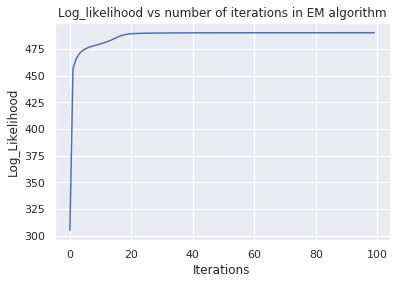

Final log likelihood = 490.2304209357971
iteration     |    0    |     LogLikelihood = 0.5728427478645143
iteration     |    10    |     LogLikelihood = 128.76987882291874
iteration     |    20    |     LogLikelihood = 130.79634089462684
iteration     |    30    |     LogLikelihood = 131.05803411908684
iteration     |    40    |     LogLikelihood = 131.18226829506517
iteration     |    50    |     LogLikelihood = 131.25194013011662
iteration     |    60    |     LogLikelihood = 131.2959498403318
iteration     |    70    |     LogLikelihood = 131.32591478965145
iteration     |    80    |     LogLikelihood = 131.3468003822362
iteration     |    90    |     LogLikelihood = 131.3614377306373
EM completed


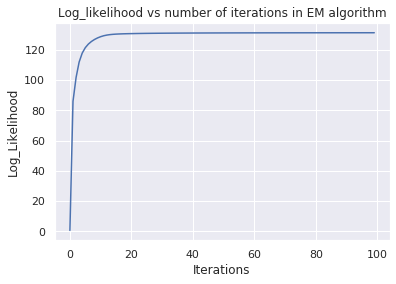

Final log likelihood = 131.37183503185608
iteration     |    0    |     LogLikelihood = 796.5347319752831
iteration     |    10    |     LogLikelihood = 914.5412143985737
iteration     |    20    |     LogLikelihood = 920.7621078688538
iteration     |    30    |     LogLikelihood = 921.8607655393272
iteration     |    40    |     LogLikelihood = 921.9733581611893
iteration     |    50    |     LogLikelihood = 922.0139038855466
iteration     |    60    |     LogLikelihood = 922.0439487128222
iteration     |    70    |     LogLikelihood = 922.073837460269
iteration     |    80    |     LogLikelihood = 922.1068058536845
iteration     |    90    |     LogLikelihood = 922.1445657386734
EM completed


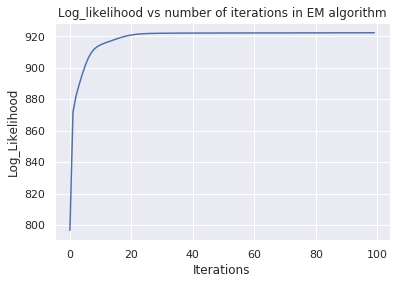

Final log likelihood = 922.1882442670432
iteration     |    0    |     LogLikelihood = -219.2705001246465
iteration     |    10    |     LogLikelihood = -141.7903388305813
iteration     |    20    |     LogLikelihood = -137.43048557982604
iteration     |    30    |     LogLikelihood = -134.36404904574476
iteration     |    40    |     LogLikelihood = -125.7489867493098
iteration     |    50    |     LogLikelihood = -124.88011269189248
iteration     |    60    |     LogLikelihood = -124.43776788925982
iteration     |    70    |     LogLikelihood = -124.2815165946005
iteration     |    80    |     LogLikelihood = -124.1994672914005
iteration     |    90    |     LogLikelihood = -124.1380964598712
EM completed


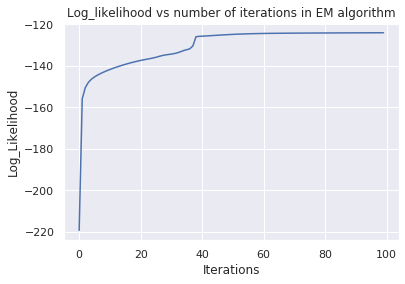

Final log likelihood = -124.08749321828978
iteration     |    0    |     LogLikelihood = -355.01368454213366
iteration     |    10    |     LogLikelihood = -94.59398911973634
iteration     |    20    |     LogLikelihood = -90.74495212010046
iteration     |    30    |     LogLikelihood = -90.39064702940851
iteration     |    40    |     LogLikelihood = -90.26812784412462
iteration     |    50    |     LogLikelihood = -90.18489888932604
iteration     |    60    |     LogLikelihood = -90.08927098410851
iteration     |    70    |     LogLikelihood = -90.01379297370718
iteration     |    80    |     LogLikelihood = -90.00342013169374
iteration     |    90    |     LogLikelihood = -90.00021037659641
EM completed


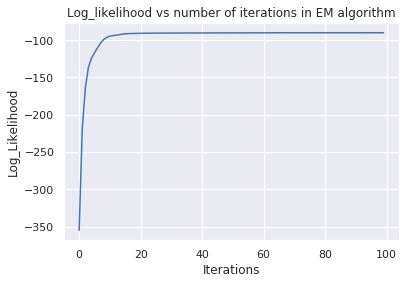

Final log likelihood = -89.99887844665817
iteration     |    0    |     LogLikelihood = -26.343255748619164
iteration     |    10    |     LogLikelihood = 67.50793469469801
iteration     |    20    |     LogLikelihood = 73.9713705345007
iteration     |    30    |     LogLikelihood = 79.32244236919296
iteration     |    40    |     LogLikelihood = 88.94463688968254
iteration     |    50    |     LogLikelihood = 97.12879772645621
iteration     |    60    |     LogLikelihood = 97.31230652931004
iteration     |    70    |     LogLikelihood = 97.60926859511342
iteration     |    80    |     LogLikelihood = 98.10438911013993
iteration     |    90    |     LogLikelihood = 98.6931638340459
EM completed


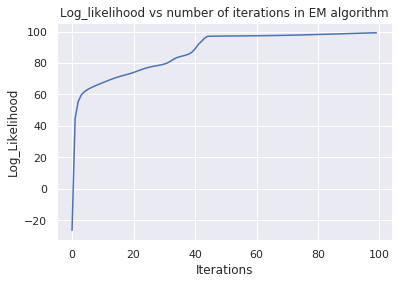

Final log likelihood = 99.27118314605384


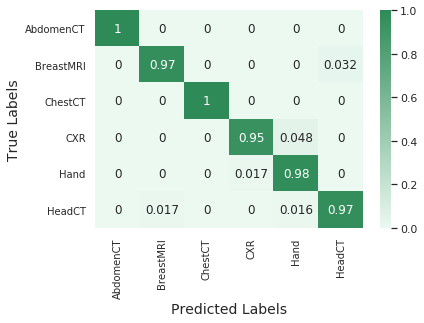

Macro F1 = 0.9780532670852504, Accuracy = 0.9788359788359788


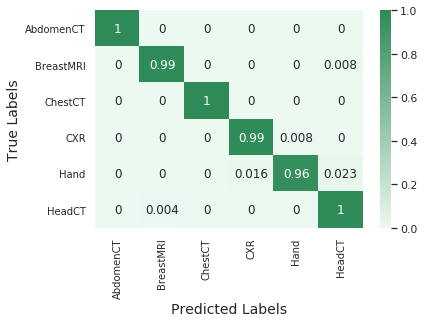

Macro F1 = 0.9900829991453982, Accuracy = 0.9900530503978779
Doing EM for 5 gaussians
iteration     |    0    |     LogLikelihood = 385.38957761901975
iteration     |    10    |     LogLikelihood = 488.4849212911383
iteration     |    20    |     LogLikelihood = 492.5356996113082
iteration     |    30    |     LogLikelihood = 493.1627940981272
iteration     |    40    |     LogLikelihood = 495.7081014021399
iteration     |    50    |     LogLikelihood = 496.54607376158896
iteration     |    60    |     LogLikelihood = 496.7479573741519
iteration     |    70    |     LogLikelihood = 496.96316715393215
iteration     |    80    |     LogLikelihood = 497.3436613906688
iteration     |    90    |     LogLikelihood = 497.89018122347113
EM completed


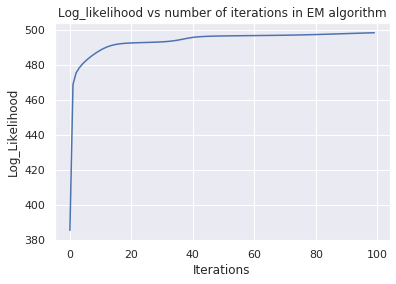

Final log likelihood = 498.42218423899334
iteration     |    0    |     LogLikelihood = 8.330862441800765
iteration     |    10    |     LogLikelihood = 129.5700106002684
iteration     |    20    |     LogLikelihood = 133.14795459763897
iteration     |    30    |     LogLikelihood = 138.97976726678596
iteration     |    40    |     LogLikelihood = 139.78277795871364
iteration     |    50    |     LogLikelihood = 140.05691136902584
iteration     |    60    |     LogLikelihood = 140.46812754684183
iteration     |    70    |     LogLikelihood = 140.7156166115085
iteration     |    80    |     LogLikelihood = 140.819403404841
iteration     |    90    |     LogLikelihood = 140.89440355521276
EM completed


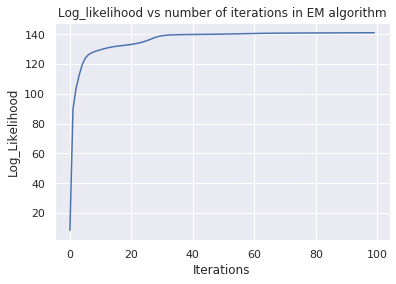

Final log likelihood = 140.9604091075748
iteration     |    0    |     LogLikelihood = 729.69474313792
iteration     |    10    |     LogLikelihood = 916.5079974862526
iteration     |    20    |     LogLikelihood = 920.2051452252407
iteration     |    30    |     LogLikelihood = 923.5057615815598
iteration     |    40    |     LogLikelihood = 924.6013422333319
iteration     |    50    |     LogLikelihood = 925.2575595418249
iteration     |    60    |     LogLikelihood = 925.840392294715
iteration     |    70    |     LogLikelihood = 926.1173920026401
iteration     |    80    |     LogLikelihood = 926.3100585738335
iteration     |    90    |     LogLikelihood = 927.1116750063535
EM completed


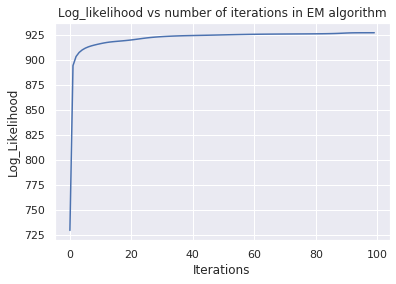

Final log likelihood = 927.3826332602025
iteration     |    0    |     LogLikelihood = -255.70397841536538
iteration     |    10    |     LogLikelihood = -132.17003309231296
iteration     |    20    |     LogLikelihood = -128.8182663989918
iteration     |    30    |     LogLikelihood = -127.28854431831958
iteration     |    40    |     LogLikelihood = -126.20200825593412
iteration     |    50    |     LogLikelihood = -124.93162393437753
iteration     |    60    |     LogLikelihood = -119.61181579434503
iteration     |    70    |     LogLikelihood = -116.73793761983099
iteration     |    80    |     LogLikelihood = -115.91739855149318
iteration     |    90    |     LogLikelihood = -115.76290331200885
EM completed


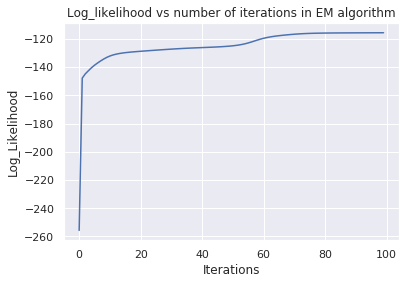

Final log likelihood = -115.68251342836253
iteration     |    0    |     LogLikelihood = -308.64652530518254
iteration     |    10    |     LogLikelihood = -94.57539061082632
iteration     |    20    |     LogLikelihood = -88.03618919200736
iteration     |    30    |     LogLikelihood = -82.8552642709185
iteration     |    40    |     LogLikelihood = -79.41014437610362
iteration     |    50    |     LogLikelihood = -77.85742865526838
iteration     |    60    |     LogLikelihood = -74.99995273932231
iteration     |    70    |     LogLikelihood = -74.2312720235318
EM completed


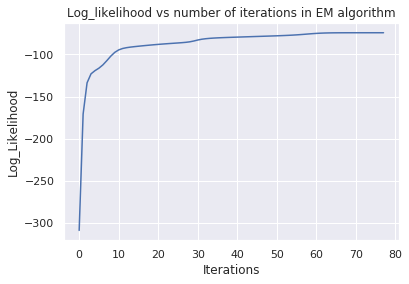

Final log likelihood = -74.22611570433166
iteration     |    0    |     LogLikelihood = -14.52659256694283
iteration     |    10    |     LogLikelihood = 73.88432098756442
iteration     |    20    |     LogLikelihood = 79.89024295113771
iteration     |    30    |     LogLikelihood = 82.3657022419282
iteration     |    40    |     LogLikelihood = 90.8264591536885
iteration     |    50    |     LogLikelihood = 101.47453470523669
iteration     |    60    |     LogLikelihood = 101.75641203567203
iteration     |    70    |     LogLikelihood = 101.8205007149776
iteration     |    80    |     LogLikelihood = 101.8694796914848
iteration     |    90    |     LogLikelihood = 101.9146245269644
EM completed


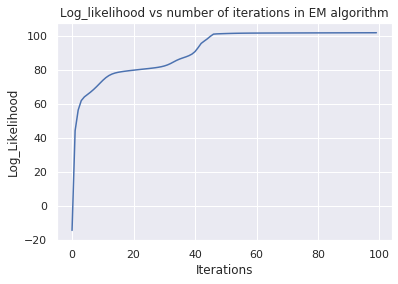

Final log likelihood = 101.95662108718724


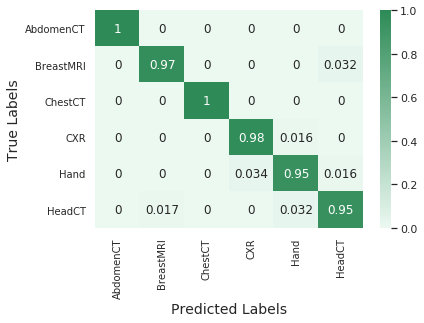

Macro F1 = 0.9755056537665233, Accuracy = 0.9761904761904762


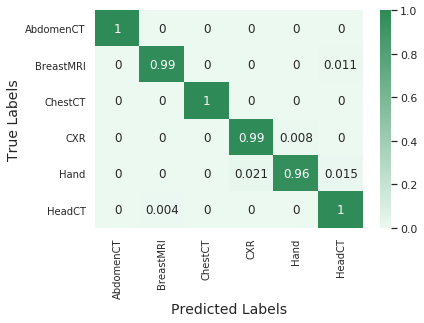

Macro F1 = 0.9900435679670411, Accuracy = 0.9900530503978779
Doing EM for 6 gaussians
iteration     |    0    |     LogLikelihood = 420.04963373170625
iteration     |    10    |     LogLikelihood = 485.44444130530417
iteration     |    20    |     LogLikelihood = 490.35956686977886
iteration     |    30    |     LogLikelihood = 494.0647056944757
iteration     |    40    |     LogLikelihood = 497.015215777987
iteration     |    50    |     LogLikelihood = 498.8333052132449
iteration     |    60    |     LogLikelihood = 500.25499205429827
iteration     |    70    |     LogLikelihood = 500.52225243123087
iteration     |    80    |     LogLikelihood = 500.69602610511555
iteration     |    90    |     LogLikelihood = 500.892527562277
EM completed


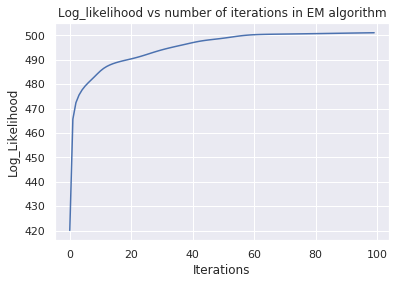

Final log likelihood = 501.07372923216917
iteration     |    0    |     LogLikelihood = -35.03430468550971
iteration     |    10    |     LogLikelihood = 127.5688945419736
iteration     |    20    |     LogLikelihood = 135.85345522586118
iteration     |    30    |     LogLikelihood = 137.1745129916369
iteration     |    40    |     LogLikelihood = 137.38556225024567
iteration     |    50    |     LogLikelihood = 137.44314346674824
iteration     |    60    |     LogLikelihood = 137.48150918171797
iteration     |    70    |     LogLikelihood = 137.52814849374425
iteration     |    80    |     LogLikelihood = 137.59888737801776
iteration     |    90    |     LogLikelihood = 137.70773793056986
EM completed


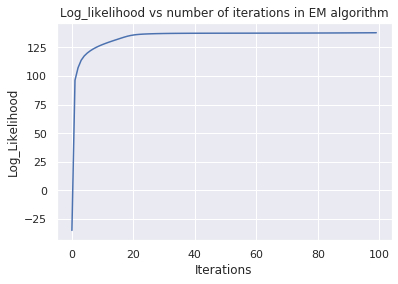

Final log likelihood = 137.85210824193544
iteration     |    0    |     LogLikelihood = 787.2417282675815
iteration     |    10    |     LogLikelihood = 917.7836367722225
iteration     |    20    |     LogLikelihood = 921.05329377966
iteration     |    30    |     LogLikelihood = 925.5462166352362
iteration     |    40    |     LogLikelihood = 928.812829231054
iteration     |    50    |     LogLikelihood = 930.1344500434494
iteration     |    60    |     LogLikelihood = 931.1399178104392
iteration     |    70    |     LogLikelihood = 932.908235948596
iteration     |    80    |     LogLikelihood = 933.3360230657257
iteration     |    90    |     LogLikelihood = 933.4846283571397
EM completed


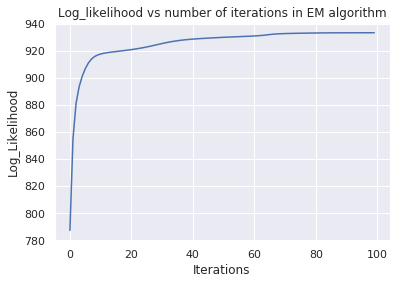

Final log likelihood = 933.5201884274426
iteration     |    0    |     LogLikelihood = -228.80993455471406
iteration     |    10    |     LogLikelihood = -126.72953615335989
iteration     |    20    |     LogLikelihood = -116.38348390470327
iteration     |    30    |     LogLikelihood = -115.53135010578234
iteration     |    40    |     LogLikelihood = -113.52460264601757


/home/harman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/home/harman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/harman/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


iteration     |    50    |     LogLikelihood = nan
iteration     |    60    |     LogLikelihood = nan
iteration     |    70    |     LogLikelihood = nan
iteration     |    80    |     LogLikelihood = nan
iteration     |    90    |     LogLikelihood = nan
EM completed


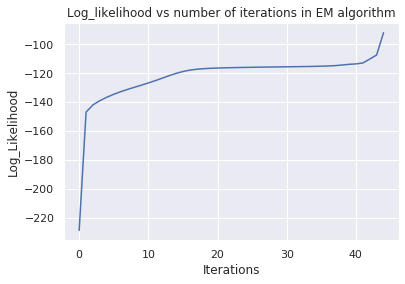

Final log likelihood = nan
iteration     |    0    |     LogLikelihood = -325.62209318003534
iteration     |    10    |     LogLikelihood = -86.45144105818233
iteration     |    20    |     LogLikelihood = -82.83284280228582
iteration     |    30    |     LogLikelihood = -81.27712049314106
iteration     |    40    |     LogLikelihood = -77.36923719935363
iteration     |    50    |     LogLikelihood = -77.17406669187847
iteration     |    60    |     LogLikelihood = -77.0346428889099
iteration     |    70    |     LogLikelihood = -76.92097097660655
iteration     |    80    |     LogLikelihood = -76.836928787485
iteration     |    90    |     LogLikelihood = -76.7818311623836
EM completed


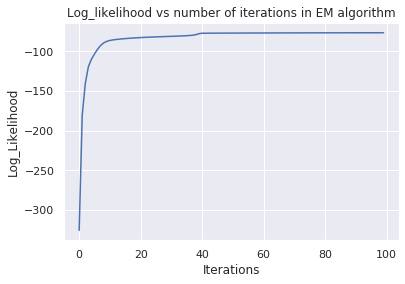

Final log likelihood = -76.74658828789897
iteration     |    0    |     LogLikelihood = -47.38449721606221
iteration     |    10    |     LogLikelihood = 76.96423708360567
iteration     |    20    |     LogLikelihood = 84.37673841206419
iteration     |    30    |     LogLikelihood = 94.1895274505662
iteration     |    40    |     LogLikelihood = 104.84382026015821
iteration     |    50    |     LogLikelihood = 105.03987025436389
iteration     |    60    |     LogLikelihood = 105.1898237591804
iteration     |    70    |     LogLikelihood = 105.30841866215442
iteration     |    80    |     LogLikelihood = 105.39539740810292
iteration     |    90    |     LogLikelihood = 105.4555833168523
EM completed


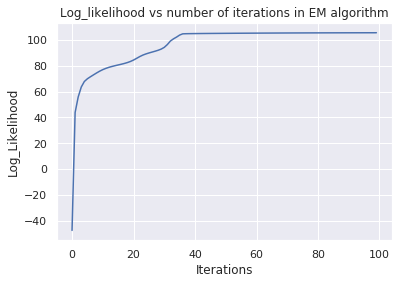

Final log likelihood = 105.4964646218019


/home/harman/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/harman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


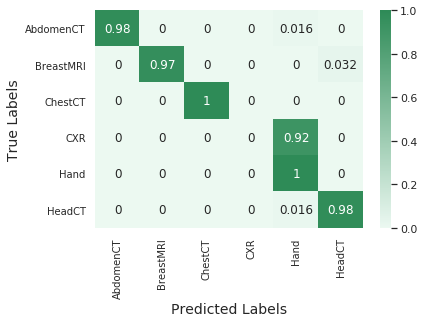

Macro F1 = 0.9256758864394922, Accuracy = 0.8359788359788359


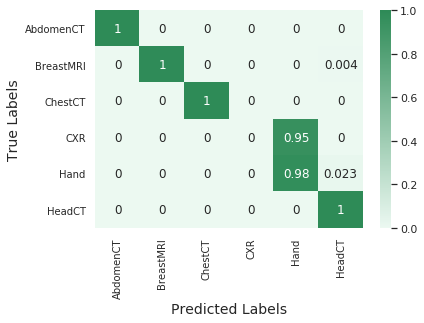

Macro F1 = 0.9302675432860547, Accuracy = 0.8342175066312998


In [180]:
for num_gaussians in [4, 5, 6]:
    print('Doing EM for {} gaussians'.format(num_gaussians))
    gmm_params = get_gmm_params(X_bv_train, y_bv_train, num_gauss = num_gaussians, iter_max = 100, stop_thresh = 0.0001)
    priors = priors_naive = getpriors(y_bv_train)
    
    # for validation data
    y_pred_valid_gmm = prediction_gmm(X_bv_valid, priors, gmm_params, num_gaussians)
    conf_mat_norm_gmm, stats_df_norm_gmm, macroF1_norm_gmm, accuracy_norm_gmm = performance_metrics_multiclass(y_pred_valid_gmm, y_bv_valid, numcat)
    print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_gmm, accuracy_norm_gmm))
    stats_df_norm_gmm
    valid_acc_list.append(accuracy_norm_gmm)
    
    # for train data - 
    y_pred_train_gmm = prediction_gmm(X_bv_train, priors, gmm_params, num_gaussians)
    conf_mat_norm_gmm, stats_df_norm_gmm, macroF1_norm_gmm, accuracy_norm_gmm = performance_metrics_multiclass(y_pred_train_gmm, y_bv_train, numcat)
    print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_gmm, accuracy_norm_gmm))
    stats_df_norm_gmm    
    train_acc_list.append(accuracy_norm_gmm)

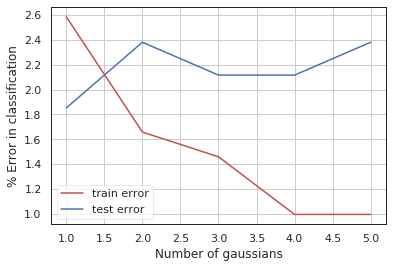

In [219]:
train_error = 1 - np.array(train_acc_list)
test_error = 1 - np.array(valid_acc_list)
number_of_gaussians = [1, 2, 3, 4, 5]
plt.plot(number_of_gaussians, train_error[:-1]*100, label = 'train error', color = 'r')
plt.plot(number_of_gaussians, test_error[:-1]*100, label = 'test error', color = 'b')
plt.xlabel('Number of gaussians')
plt.ylabel('% Error in classification')
ax = plt.gca()
# ax.set_facecolor('white')
ax.grid(b=True, which='major', linestyle='-')
sb.set_style("white")
plt.legend()

In [210]:
# ###old plots
# train_error = 1 - np.array(train_acc_list)
# test_error = 1 - np.array(test_acc_list)
# number_of_gaussians = [1, 2, 3, 5, 8, 10]
# plt.plot(number_of_gaussians, train_error[:-2]*100, label = 'train error', color = 'r')
# plt.plot(number_of_gaussians, test_error[:-2]*100, label = 'test error', color = 'b')
# plt.xlabel('Number of gaussians')
# plt.ylabel('% Error in classification')
# plt.legend()

NameError: name 'test_acc_list' is not defined

From the abouve plot we see that for the Bayes classifier, it is best to use 2 gaussians in GMM. Hence we find the statistics of the model using 2 gaussians.We test the model on a different test set to quantify the results.

Hence we conclude that the ideal numbre of gaussians should be 2 after which overfitting takes place

## Cross Validating Bayes (with GMM class cond densities)
we are using the optimal number of gaussians ie 2 as found above
we finally need, 
1. 5 fold cross validation train and test( should be validation) accuracies.
2. confusion maatrix for 80percent train and 20 percent test data - and get per class precision recall and F1 and finally macro F1

In [156]:
def cross_validate_gmmbayes(X_train, y_train ,k, num_gauss): 
    #data is already shuffled before so no need to do that again
    
    #Kfoldsplit is a list of k (almost) equal sized parts of the np array
    Kfoldsplit_X = np.array_split(X_train, k, axis = 0)
    Kfoldsplit_y = np.array_split(y_train, k, axis = 0)
    
    #Use test_score and train_score to store the metric you want to analyse i.e. accuracy, precision, 
    cv_train_accuracy = 0  
    cv_valid_accuracy = 0
    for i in range(k):
        #make train and validation sets
        valid_X, valid_y = Kfoldsplit_X[i], Kfoldsplit_y[i]
        train_X, train_y = np.concatenate(Kfoldsplit_X[:i]+Kfoldsplit_X[i+1:], axis = 0), np.concatenate(Kfoldsplit_y[:i]+Kfoldsplit_y[i+1:], axis = 0)
        #training phase
        priors_GMM = getpriors(train_y)
        gmm_params = get_gmm_params(train_X, train_y, num_gauss = 2, iter_max = 100, stop_thresh = 0.0001)
        
        #validation stats
        y_pred_valid_gmm = prediction_gmm(valid_X, priors_GMM, gmm_params, num_gauss = 2)
        conf_mat, stats_df, macroF1, accuracy_valid = performance_metrics_multiclass(y_pred_valid_gmm, valid_y, numcat)

        #train stats
        y_pred_train_gmm = prediction_gmm(train_X, priors_GMM, gmm_params, num_gauss = 2)
        conf_mat, stats_df, macroF1, accuracy_train = performance_metrics_multiclass(y_pred_train_gmm, train_y, numcat)
        
        cv_train_accuracy += accuracy_train   
        cv_valid_accuracy += accuracy_valid
    print('Cross Validation train accuracy = {}, test accuracy = {}'.format(cv_train_accuracy/k, cv_valid_accuracy/k))        
    return cv_train_accuracy/k, cv_valid_accuracy/k

iteration     |    0    |     LogLikelihood = 297.53301881930133
iteration     |    10    |     LogLikelihood = 487.3941256180813
iteration     |    20    |     LogLikelihood = 488.9348784430238
iteration     |    30    |     LogLikelihood = 490.0243520188242
iteration     |    40    |     LogLikelihood = 490.32589786793164
iteration     |    50    |     LogLikelihood = 490.4062617907565
iteration     |    60    |     LogLikelihood = 490.43145448998564
iteration     |    70    |     LogLikelihood = 490.43965664344915
iteration     |    80    |     LogLikelihood = 490.44237053919227
EM completed


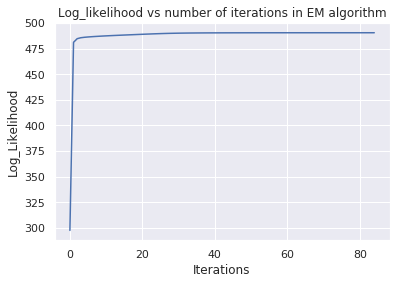

Final log likelihood = 490.44285345731726
iteration     |    0    |     LogLikelihood = -43.34368452647839
iteration     |    10    |     LogLikelihood = 105.83619206830373
iteration     |    20    |     LogLikelihood = 106.27598154553395
iteration     |    30    |     LogLikelihood = 106.31902165930197
iteration     |    40    |     LogLikelihood = 106.32355382516774
EM completed


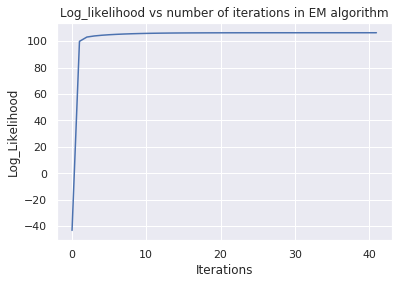

Final log likelihood = 106.32366511631639
iteration     |    0    |     LogLikelihood = 769.1315243456456
iteration     |    10    |     LogLikelihood = 908.7263971798651
iteration     |    20    |     LogLikelihood = 909.2831844192334
iteration     |    30    |     LogLikelihood = 909.4812109931224
iteration     |    40    |     LogLikelihood = 909.5694693657616
iteration     |    50    |     LogLikelihood = 909.6605938901118
iteration     |    60    |     LogLikelihood = 909.7790951145041
iteration     |    70    |     LogLikelihood = 909.9570885015586
iteration     |    80    |     LogLikelihood = 910.2257968745486
iteration     |    90    |     LogLikelihood = 910.5405139900286
EM completed


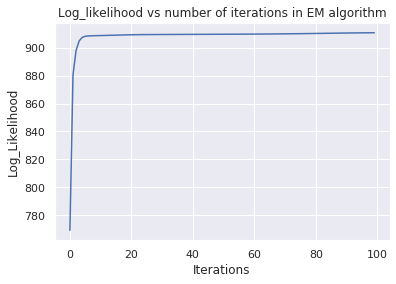

Final log likelihood = 910.7505211497419
iteration     |    0    |     LogLikelihood = -301.28128066157785
iteration     |    10    |     LogLikelihood = -151.63766200038575
iteration     |    20    |     LogLikelihood = -143.05811676803611
iteration     |    30    |     LogLikelihood = -141.42509426546965
iteration     |    40    |     LogLikelihood = -141.27453844824146
iteration     |    50    |     LogLikelihood = -141.219663417549
iteration     |    60    |     LogLikelihood = -141.2001848136691
iteration     |    70    |     LogLikelihood = -141.19355624680634
iteration     |    80    |     LogLikelihood = -141.19134274227312
EM completed


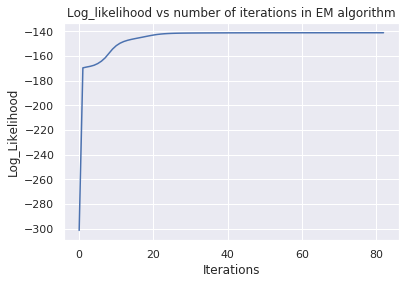

Final log likelihood = -141.1911252957036
iteration     |    0    |     LogLikelihood = -285.2499868834165
iteration     |    10    |     LogLikelihood = -207.10515835705493
iteration     |    20    |     LogLikelihood = -190.58990230854022
iteration     |    30    |     LogLikelihood = -117.2031237316675
iteration     |    40    |     LogLikelihood = -116.82041932926734
iteration     |    50    |     LogLikelihood = -116.81086040323741
EM completed


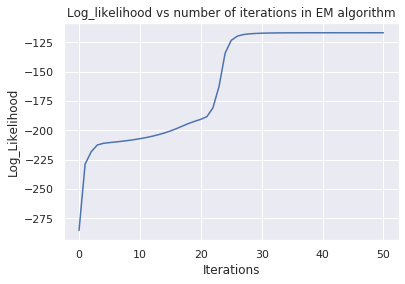

Final log likelihood = -116.81086040323741
iteration     |    0    |     LogLikelihood = 3.336526010745982
iteration     |    10    |     LogLikelihood = 52.33204468453571
iteration     |    20    |     LogLikelihood = 54.56562576426463
iteration     |    30    |     LogLikelihood = 57.20913747752248
iteration     |    40    |     LogLikelihood = 57.58803772558696
iteration     |    50    |     LogLikelihood = 57.602951769737714
EM completed


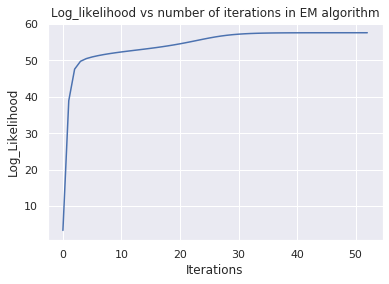

Final log likelihood = 57.60319887838408


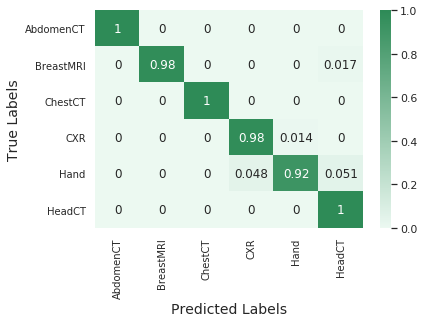

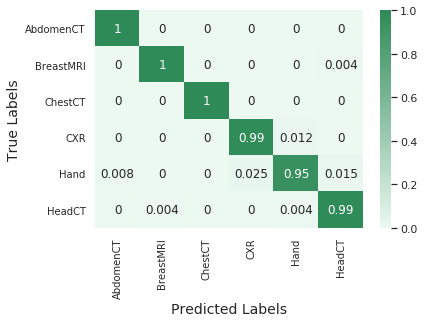

iteration     |    0    |     LogLikelihood = 163.42853128834093
iteration     |    10    |     LogLikelihood = 483.28992680425847
iteration     |    20    |     LogLikelihood = 485.10904152155416
iteration     |    30    |     LogLikelihood = 485.2292889585786
iteration     |    40    |     LogLikelihood = 485.25945837355584
iteration     |    50    |     LogLikelihood = 485.2674821339964
iteration     |    60    |     LogLikelihood = 485.2696651438495
EM completed


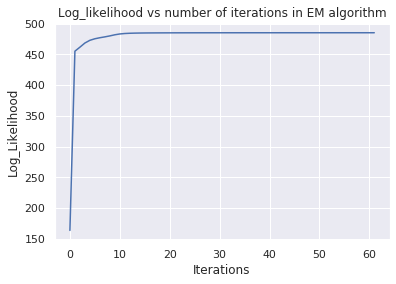

Final log likelihood = 485.2697654346106
iteration     |    0    |     LogLikelihood = 48.40304832164058
iteration     |    10    |     LogLikelihood = 115.40464725108825
iteration     |    20    |     LogLikelihood = 116.4958838960929
iteration     |    30    |     LogLikelihood = 116.63057150015868
iteration     |    40    |     LogLikelihood = 116.65074142999363
iteration     |    50    |     LogLikelihood = 116.653857961764
EM completed


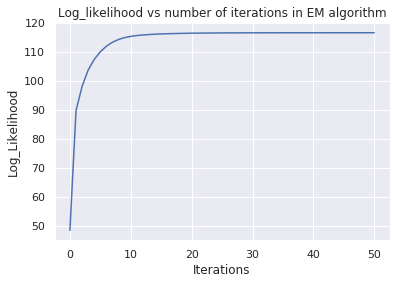

Final log likelihood = 116.653857961764
iteration     |    0    |     LogLikelihood = 882.7843080630339
iteration     |    10    |     LogLikelihood = 944.7867786346172
iteration     |    20    |     LogLikelihood = 950.3033920595087
iteration     |    30    |     LogLikelihood = 950.5537644266282
iteration     |    40    |     LogLikelihood = 950.61346781462
iteration     |    50    |     LogLikelihood = 950.6256187642904
EM completed


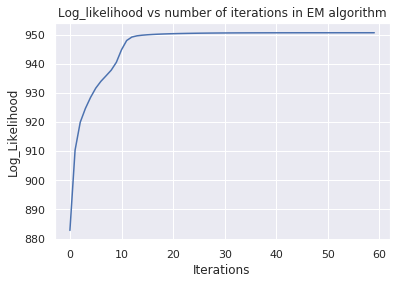

Final log likelihood = 950.6278146461245
iteration     |    0    |     LogLikelihood = -335.1107911131201
iteration     |    10    |     LogLikelihood = -124.60608991178543
iteration     |    20    |     LogLikelihood = -124.1820471782174
EM completed


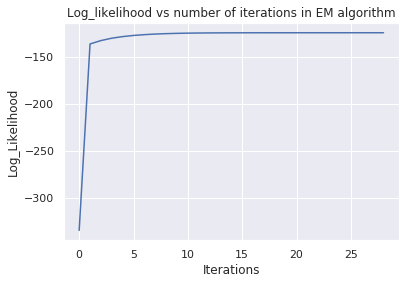

Final log likelihood = -124.17627957935267
iteration     |    0    |     LogLikelihood = -421.3717732423241
iteration     |    10    |     LogLikelihood = -149.02814142671778
iteration     |    20    |     LogLikelihood = -137.07051009902855
iteration     |    30    |     LogLikelihood = -136.96931817503057
EM completed


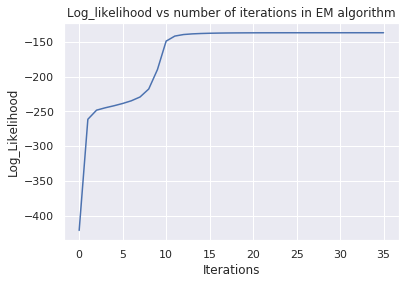

Final log likelihood = -136.9675045920642
iteration     |    0    |     LogLikelihood = -106.71668239299404
iteration     |    10    |     LogLikelihood = 40.79051774517933
iteration     |    20    |     LogLikelihood = 50.47504716061134
iteration     |    30    |     LogLikelihood = 59.61504369616485
iteration     |    40    |     LogLikelihood = 62.577166987255225
iteration     |    50    |     LogLikelihood = 63.73368494698178
iteration     |    60    |     LogLikelihood = 63.92676513204398
iteration     |    70    |     LogLikelihood = 63.94263270064298
EM completed


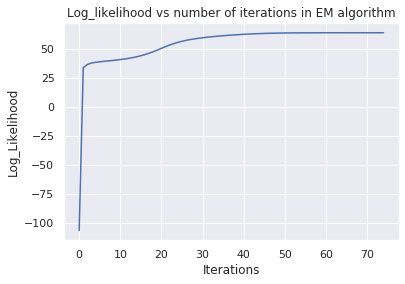

Final log likelihood = 63.94335159320243


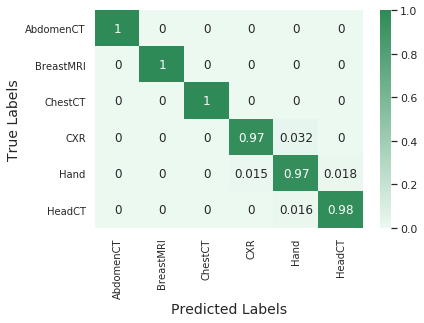

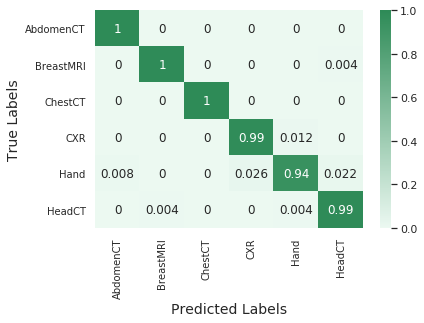

iteration     |    0    |     LogLikelihood = 343.94029352350384
iteration     |    10    |     LogLikelihood = 461.4661941800516
iteration     |    20    |     LogLikelihood = 461.6719933438088
iteration     |    30    |     LogLikelihood = 461.9836607444722
iteration     |    40    |     LogLikelihood = 462.4634079401729
iteration     |    50    |     LogLikelihood = 463.08027821603775
iteration     |    60    |     LogLikelihood = 463.94896204861266
iteration     |    70    |     LogLikelihood = 465.3984230124563
iteration     |    80    |     LogLikelihood = 466.5056913497077
iteration     |    90    |     LogLikelihood = 466.7099029457744
EM completed


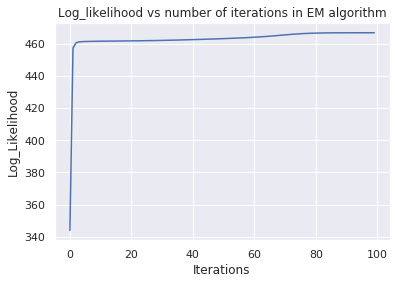

Final log likelihood = 466.7312916598876
iteration     |    0    |     LogLikelihood = 5.3072319522671005
iteration     |    10    |     LogLikelihood = 83.31614952946644
iteration     |    20    |     LogLikelihood = 85.01356793378649
iteration     |    30    |     LogLikelihood = 85.7813290936542
iteration     |    40    |     LogLikelihood = 87.0373875482456
iteration     |    50    |     LogLikelihood = 88.31079127016045
iteration     |    60    |     LogLikelihood = 88.80629152361774
iteration     |    70    |     LogLikelihood = 88.90683872547943
iteration     |    80    |     LogLikelihood = 88.92272683810125
EM completed


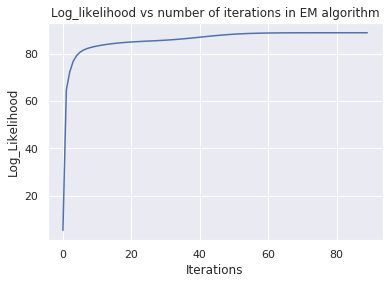

Final log likelihood = 88.92495680972715
iteration     |    0    |     LogLikelihood = 720.7580182547102
iteration     |    10    |     LogLikelihood = 921.713405264216
iteration     |    20    |     LogLikelihood = 922.1278524467904
iteration     |    30    |     LogLikelihood = 922.1974503341002
iteration     |    40    |     LogLikelihood = 922.2141239969512
iteration     |    50    |     LogLikelihood = 922.218759645495
EM completed


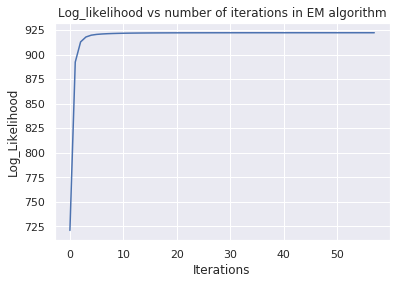

Final log likelihood = 922.2198861930385
iteration     |    0    |     LogLikelihood = -307.2389783484338
iteration     |    10    |     LogLikelihood = -167.41274754006014
iteration     |    20    |     LogLikelihood = -157.70827093525577
iteration     |    30    |     LogLikelihood = -157.22916081323362
iteration     |    40    |     LogLikelihood = -157.16280454316552
iteration     |    50    |     LogLikelihood = -157.10602723133817
iteration     |    60    |     LogLikelihood = -157.0170124607098
iteration     |    70    |     LogLikelihood = -156.8679989807806
iteration     |    80    |     LogLikelihood = -156.62718391311643
iteration     |    90    |     LogLikelihood = -156.2949130369468
EM completed


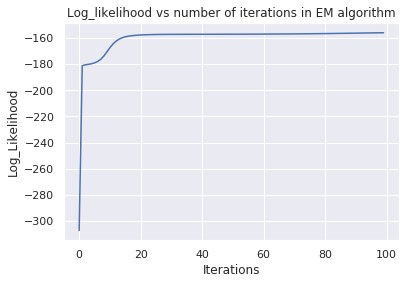

Final log likelihood = -155.96255446845936
iteration     |    0    |     LogLikelihood = -360.769209474503
iteration     |    10    |     LogLikelihood = -141.69827056532205
iteration     |    20    |     LogLikelihood = -141.61585151655956
iteration     |    30    |     LogLikelihood = -141.61015917449552
EM completed


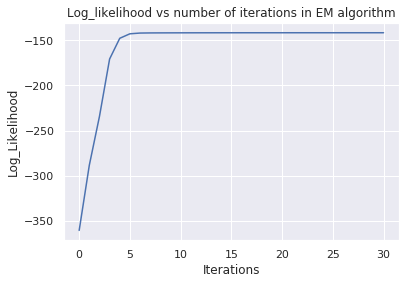

Final log likelihood = -141.61015917449552
iteration     |    0    |     LogLikelihood = -23.177032844182584
iteration     |    10    |     LogLikelihood = 55.93990252369906
iteration     |    20    |     LogLikelihood = 64.03790805260603
iteration     |    30    |     LogLikelihood = 67.83232549692477
iteration     |    40    |     LogLikelihood = 70.06890270160707
iteration     |    50    |     LogLikelihood = 74.54836235733359
iteration     |    60    |     LogLikelihood = 81.56016066873676
EM completed


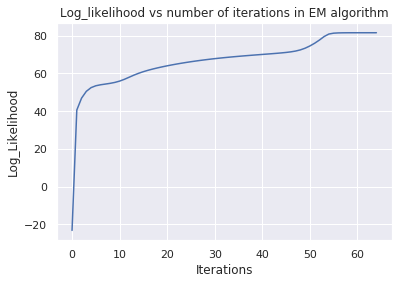

Final log likelihood = 81.56257017725564


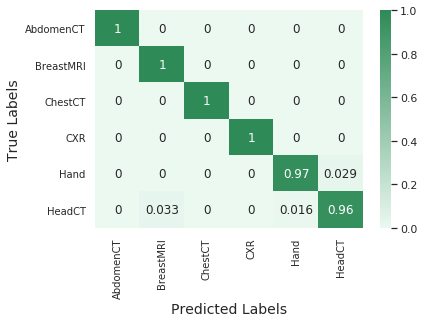

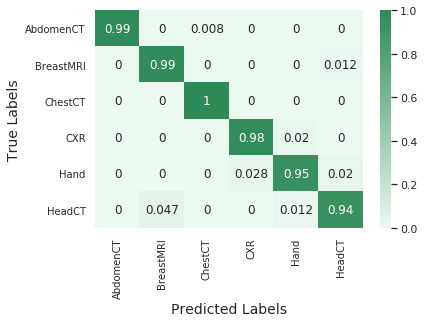

iteration     |    0    |     LogLikelihood = 333.0092318909006
iteration     |    10    |     LogLikelihood = 471.34386996719803
iteration     |    20    |     LogLikelihood = 471.5748045288478
iteration     |    30    |     LogLikelihood = 471.6188303442023
iteration     |    40    |     LogLikelihood = 471.63303037335214
iteration     |    50    |     LogLikelihood = 471.6383896547387
iteration     |    60    |     LogLikelihood = 471.6404427931441
EM completed


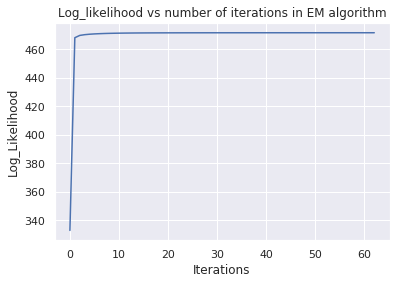

Final log likelihood = 471.64066448552086
iteration     |    0    |     LogLikelihood = 23.96010734374691
iteration     |    10    |     LogLikelihood = 104.79449206406565
iteration     |    20    |     LogLikelihood = 105.6213769763491
iteration     |    30    |     LogLikelihood = 105.69205671855524
iteration     |    40    |     LogLikelihood = 105.69794842262118
EM completed


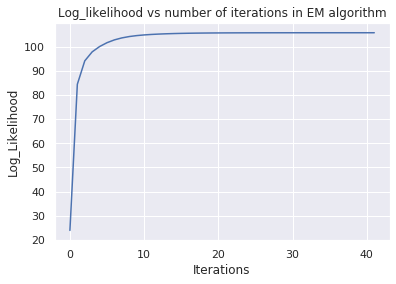

Final log likelihood = 105.6980653367368
iteration     |    0    |     LogLikelihood = 747.0431734736112
iteration     |    10    |     LogLikelihood = 931.2671362665773
iteration     |    20    |     LogLikelihood = 942.2896147289201
iteration     |    30    |     LogLikelihood = 942.3132404216791
EM completed


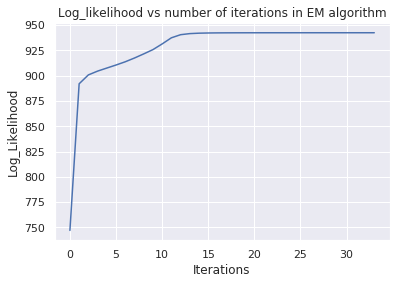

Final log likelihood = 942.3137389849599
iteration     |    0    |     LogLikelihood = -288.4555946812216
iteration     |    10    |     LogLikelihood = -144.23818148025856
iteration     |    20    |     LogLikelihood = -143.1839187338706
iteration     |    30    |     LogLikelihood = -141.04610396254952
iteration     |    40    |     LogLikelihood = -140.14481556844729
iteration     |    50    |     LogLikelihood = -139.8731138946409
iteration     |    60    |     LogLikelihood = -139.74682629503695
iteration     |    70    |     LogLikelihood = -139.68901407923704
iteration     |    80    |     LogLikelihood = -139.66305512590097
iteration     |    90    |     LogLikelihood = -139.6516001904552
EM completed


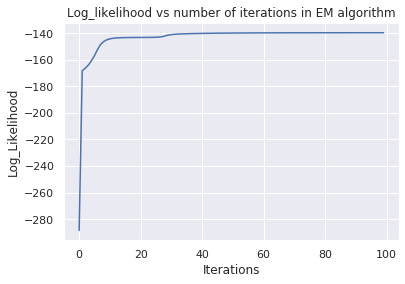

Final log likelihood = -139.64661439190607
iteration     |    0    |     LogLikelihood = -434.7518689602113
iteration     |    10    |     LogLikelihood = -108.46644639407091
iteration     |    20    |     LogLikelihood = -108.29359434979213
EM completed


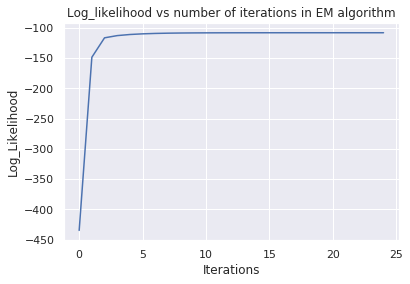

Final log likelihood = -108.29218926287736
iteration     |    0    |     LogLikelihood = -175.18127092736637
iteration     |    10    |     LogLikelihood = 70.92384785046637
iteration     |    20    |     LogLikelihood = 71.46688267789257
iteration     |    30    |     LogLikelihood = 71.61212148247243
iteration     |    40    |     LogLikelihood = 71.65981685561246
iteration     |    50    |     LogLikelihood = 71.67817920068528
iteration     |    60    |     LogLikelihood = 71.68619281638988
iteration     |    70    |     LogLikelihood = 71.69002911367762
iteration     |    80    |     LogLikelihood = 71.69199465891428
EM completed


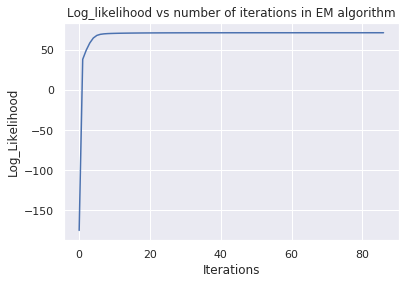

Final log likelihood = 71.69270369052037


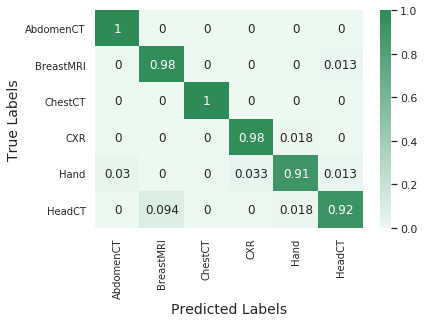

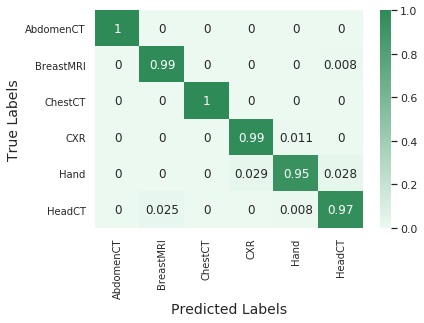

iteration     |    0    |     LogLikelihood = 329.53457329600974
iteration     |    10    |     LogLikelihood = 467.5067727271014
iteration     |    20    |     LogLikelihood = 469.6633982596817
iteration     |    30    |     LogLikelihood = 469.82845290976815
iteration     |    40    |     LogLikelihood = 469.8771684044708
iteration     |    50    |     LogLikelihood = 469.89426381532303
iteration     |    60    |     LogLikelihood = 469.8999870000992
iteration     |    70    |     LogLikelihood = 469.9018452888799
EM completed


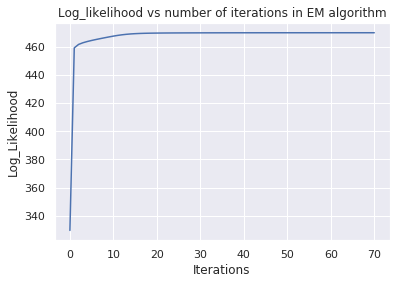

Final log likelihood = 469.9018452888799
iteration     |    0    |     LogLikelihood = -19.159843483232866
iteration     |    10    |     LogLikelihood = 109.40490599526862
iteration     |    20    |     LogLikelihood = 109.81933889829595
iteration     |    30    |     LogLikelihood = 109.85482882749301
EM completed


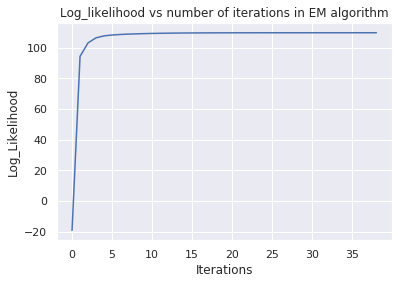

Final log likelihood = 109.857465256224
iteration     |    0    |     LogLikelihood = 685.7414851884018
iteration     |    10    |     LogLikelihood = 880.6893533109135
EM completed


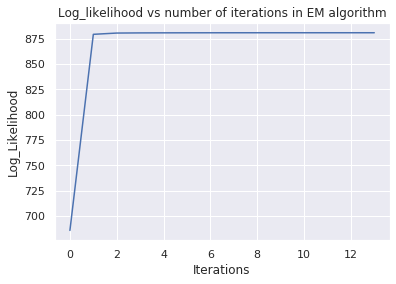

Final log likelihood = 880.6907175201667
iteration     |    0    |     LogLikelihood = -315.8598520890013
iteration     |    10    |     LogLikelihood = -155.78595613553284
iteration     |    20    |     LogLikelihood = -152.57768687178532
iteration     |    30    |     LogLikelihood = -150.20765611519408
iteration     |    40    |     LogLikelihood = -146.02360907267587
iteration     |    50    |     LogLikelihood = -145.0003033443208
iteration     |    60    |     LogLikelihood = -144.86446547403116
iteration     |    70    |     LogLikelihood = -144.83357213777555
iteration     |    80    |     LogLikelihood = -144.82620460366036
EM completed


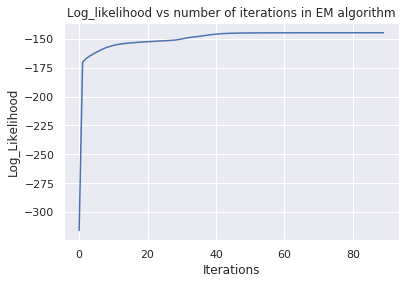

Final log likelihood = -144.82449958066303
iteration     |    0    |     LogLikelihood = -392.276529523564
iteration     |    10    |     LogLikelihood = -241.2794357148576
iteration     |    20    |     LogLikelihood = -234.60572610402244
iteration     |    30    |     LogLikelihood = -124.71427340418714
iteration     |    40    |     LogLikelihood = -124.19087974635501
EM completed


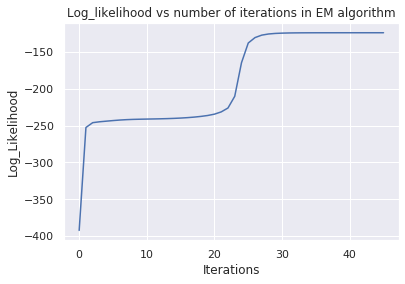

Final log likelihood = -124.18819131201153
iteration     |    0    |     LogLikelihood = -20.32152392520365
iteration     |    10    |     LogLikelihood = 54.261600217507215
iteration     |    20    |     LogLikelihood = 55.49034914023884
iteration     |    30    |     LogLikelihood = 56.70632926946761
iteration     |    40    |     LogLikelihood = 57.17251353944066
iteration     |    50    |     LogLikelihood = 57.25540422526287
iteration     |    60    |     LogLikelihood = 57.27086062541172
iteration     |    70    |     LogLikelihood = 57.274183059053904
EM completed


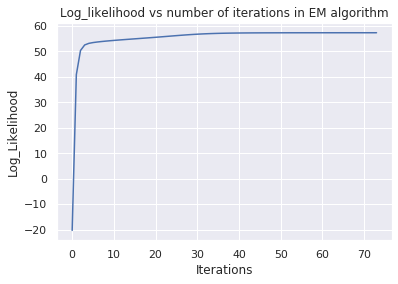

Final log likelihood = 57.27454144620159


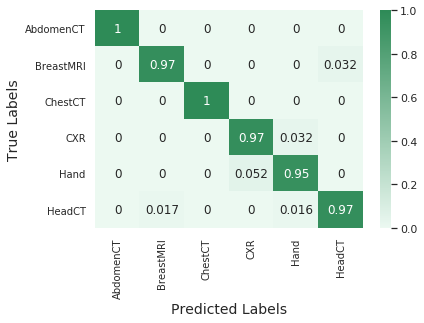

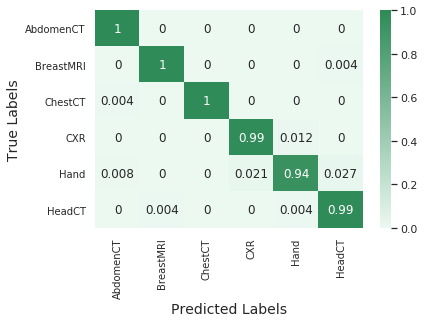

Cross Validation train accuracy = 0.98382876920616, test accuracy = 0.9787910684462409


''

In [158]:
#we are doing cross validation with number of gaussians = 2 in this block of code
#Also keep in mind, we are using only 1/nth of the data and n is defined above
cross_validate_gmmbayes(X_train_gmm, y_train_gmm, 5, num_gauss=2)

## Testing GMM 
### Modelling Class conditional densities of all classes as Sum of 2 gaussians (which is optimal as found above)

In [ ]:
#Note we are testing on the whole pca test set but we had trained on 1/nth of the data only
# for classifying test data we first model all the classes of the train data
priors_GMM = getpriors(y_train_gmm)
gmm_params = get_gmm_params(X_train_gmm, y_train_gmm, num_gauss = 2, iter_max = 100, stop_thresh = 0.0001)

iteration     |    0    |     LogLikelihood = 487.5687409808234
iteration     |    10    |     LogLikelihood = 591.9948003183927
iteration     |    20    |     LogLikelihood = 593.1090151300364
iteration     |    30    |     LogLikelihood = 593.4133111918283
iteration     |    40    |     LogLikelihood = 593.4986789059705
iteration     |    50    |     LogLikelihood = 593.5233333226572
iteration     |    60    |     LogLikelihood = 593.5306337567863
iteration     |    70    |     LogLikelihood = 593.5328316032017
EM completed


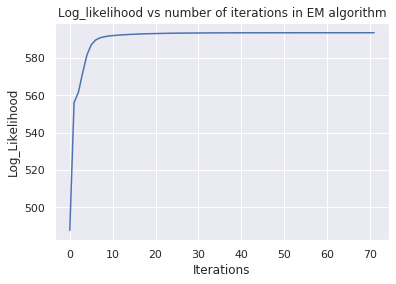

Final log likelihood = 593.5329392709871
iteration     |    0    |     LogLikelihood = 31.57063196670364
iteration     |    10    |     LogLikelihood = 131.46318329272134
iteration     |    20    |     LogLikelihood = 132.6529175578312
iteration     |    30    |     LogLikelihood = 132.76021038082075
iteration     |    40    |     LogLikelihood = 132.77184080015655
EM completed


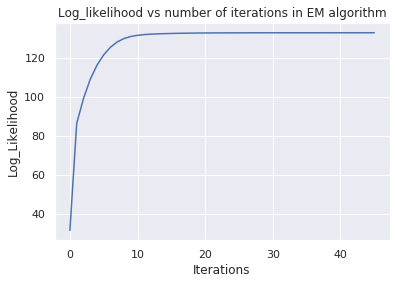

Final log likelihood = 132.7727853988451
iteration     |    0    |     LogLikelihood = 1031.964280459695
iteration     |    10    |     LogLikelihood = 1145.516025280969
iteration     |    20    |     LogLikelihood = 1150.4002156080626
iteration     |    30    |     LogLikelihood = 1150.4427184720064
iteration     |    40    |     LogLikelihood = 1150.4469439019701
iteration     |    50    |     LogLikelihood = 1150.4502846783912
iteration     |    60    |     LogLikelihood = 1150.4530826631133
iteration     |    70    |     LogLikelihood = 1150.455239427072
iteration     |    80    |     LogLikelihood = 1150.4567814585719
EM completed


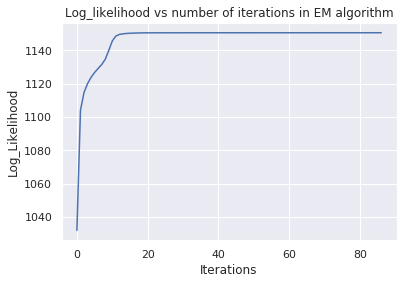

Final log likelihood = 1150.4574546020463
iteration     |    0    |     LogLikelihood = -218.8860794986506
iteration     |    10    |     LogLikelihood = -181.7691924580827
iteration     |    20    |     LogLikelihood = -180.47306364070602
iteration     |    30    |     LogLikelihood = -180.31342792488235
iteration     |    40    |     LogLikelihood = -180.2512145424168
iteration     |    50    |     LogLikelihood = -180.22229774134206
iteration     |    60    |     LogLikelihood = -180.2083481564805
iteration     |    70    |     LogLikelihood = -180.20143189406258
iteration     |    80    |     LogLikelihood = -180.19792850160738
iteration     |    90    |     LogLikelihood = -180.19612449391641
EM completed


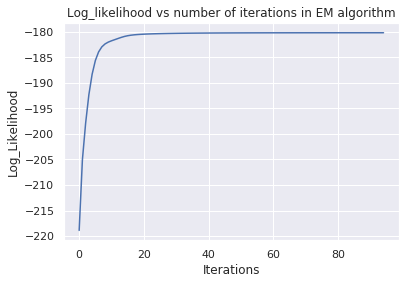

Final log likelihood = -180.19567440670963
iteration     |    0    |     LogLikelihood = -414.93090425532216
iteration     |    10    |     LogLikelihood = -158.22994771439477
iteration     |    20    |     LogLikelihood = -158.21629603550758
EM completed


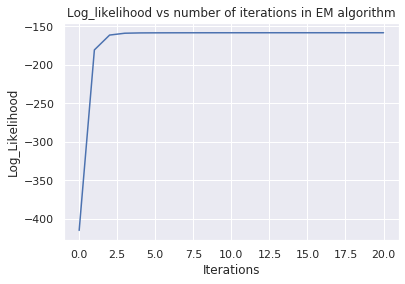

Final log likelihood = -158.21629603550758
iteration     |    0    |     LogLikelihood = -176.62579097947156
iteration     |    10    |     LogLikelihood = 65.06524622065541
iteration     |    20    |     LogLikelihood = 70.77105203269758
iteration     |    30    |     LogLikelihood = 73.4096560650458
iteration     |    40    |     LogLikelihood = 76.13197345781244
iteration     |    50    |     LogLikelihood = 77.67883384048696
iteration     |    60    |     LogLikelihood = 77.84537102177555
iteration     |    70    |     LogLikelihood = 77.85439329796323
EM completed


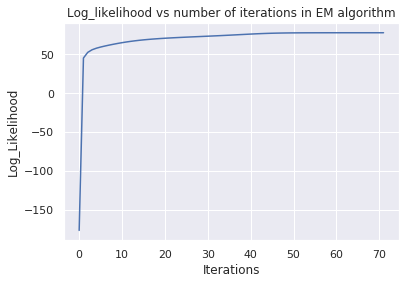

Final log likelihood = 77.85450956594927
Test data stats


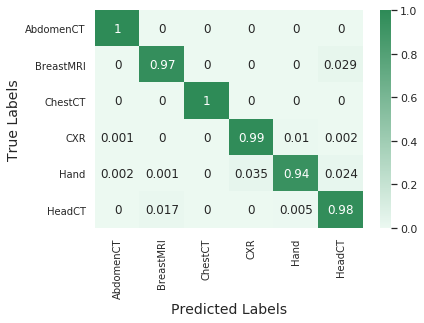

Macro F1 = 0.9788616872470599, Accuracy = 0.9789670087354763
       class  Precision    Recall        F1
0  AbdomenCT   0.997506  1.000000  0.998752
1  BreastMRI   0.981870  0.967616  0.974691
2    ChestCT   0.999500  1.000000  0.999750
3        CXR   0.965770  0.987500  0.976514
4       Hand   0.984260  0.938000  0.960573
5     HeadCT   0.946834  0.979500  0.962890
Train data stats


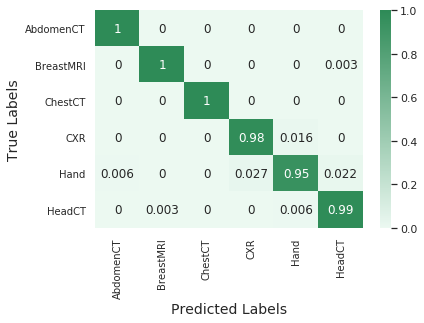

Macro F1 = 0.9861426359780864, Accuracy = 0.9862142099681867
       class  Precision    Recall        F1
0  AbdomenCT   0.993808  1.000000  0.996894
1  BreastMRI   0.996633  0.996633  0.996633
2    ChestCT   1.000000  1.000000  1.000000
3        CXR   0.973684  0.983389  0.978512
4       Hand   0.977273  0.946541  0.961661
5     HeadCT   0.975684  0.990741  0.983155


In [168]:
print('Test data stats')
y_pred_test_gmm = prediction_gmm(X_test_pca, priors_GMM, gmm_params, num_gauss = 2)
conf_mat_norm_gmm, stats_df_norm_gmm, macroF1_norm_gmm, accuracy_norm_gmm = performance_metrics_multiclass(y_pred_test_gmm, y_test, numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_gmm, accuracy_norm_gmm))
print(stats_df_norm_gmm)

print('\nTrain data stats')
y_pred_train_gmm = prediction_gmm(X_train_gmm, priors_GMM, gmm_params, num_gauss = 2)
conf_mat_norm_gmm, stats_df_norm_gmm, macroF1_norm_gmm, accuracy_norm_gmm = performance_metrics_multiclass(y_pred_train_gmm, y_train_gmm, numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_gmm, accuracy_norm_gmm))
print(stats_df_norm_gmm)

### Experiments with GMM

1. Even with 1/n = 1/25 of the data, the accuracy of gmm is higher than bith bayes as well as naive bayes algorithms which is very interesting Question arisis how low can we go on training data to still produce the same accuracy? 
2. Do naive bayes and bayes also perform well with less data?  ---->This is expected I think because the pca plots are highly clustered and the 50k training points are highly densely clustered withing clusters which suggests that even with less data these algorithms should work fine.

# Parzen
### Window functions - hypercube, gaussian kernel

In [68]:
n = 20
X_train_parzen = X_train_pca[0:X_train_pca.shape[0]//n]
y_train_parzen = y_train[0:X_train_pca.shape[0]//n]
X_test_parzen = X_test_pca[0:X_test_pca.shape[0]//n]
y_test_parzen = y_test[0:X_test_pca.shape[0]//n]

In [75]:
def unit_hypercube(x, X_train, h):
    '''x is a 1d vector'''
    u = (x.reshape(1, X_train.shape[1]) - X_train)/h
#     print(u)
    assert(u.shape == X_train.shape)
    u_mod = np.absolute(u)
    u_mod_poswindow = np.all((u_mod<=1/2), axis = 1)
    assert(u_mod_poswindow.shape == (X_train.shape[0],))
    prob = (1/X_train.shape[0]) * (1/(h**(X_train.shape[1]))) * np.sum(u_mod_poswindow)
#     print(prob)
    return prob
    
def gauss_ker_apply(u):
    '''u is a 1d array'''
    return np.exp(-0.5 * ((np.linalg.norm(u))**2))
    
def gaussian_kernel(x, X_train, h):
    '''x is a 1d vector'''
    n, d = X_train.shape
    u = (x.reshape(1, X_train.shape[1]) - X_train)/(h/np.sqrt(n))
    assert(u.shape == X_train.shape)
    kernel_applied = np.apply_along_axis(gauss_ker_apply, 1, u)
    
    prob = (1/((h*np.sqrt(2*np.pi * n))**(d))) * np.sum(kernel_applied)
    return prob

    return 1/(np.sqrt(2*np.pi))*np.exp(-1 * np.linalg.norm(x))
    
def likelihood_parzen(x, X_train, windowfn, h):
    if(windowfn == 'hypercube'):
        return unit_hypercube(x, X_train, h)
    else:
        return gaussian_kernel(x, X_train, h)
    
def parzen_classify(h, X_train, y_train, X_test, priors, windowfn):
    y_pred_test = np.zeros((X_test.shape[0],))
    for i in range(X_test.shape[0]):
        maxpost = 0
        for j in range(numcat):
            lik = likelihood_parzen(X_test[i], X_train[np.where(y_train==j)], windowfn, h)
            post_j = priors[j]*lik
            if(post_j>maxpost):
                maxpost = post_j
                y_pred_test[i] = j
      
    return y_pred_test


### Parzen - Bias Variance Curves 
model complexity increases with decrease in h - window length

In [82]:
# data used for bias variance curve is a subset of the test data. To make this curve 
# we would not be cross validating to save time
#for making the curve we are using 5000 train points and 500 validation points
n = 10
X_train_parzenBV = X_train_pca[0:5000]
y_train_parzenBV = y_train[0:5000]
X_valid_parzenBV = X_train_pca[5000:5500]
y_valid_parzenBV = y_train[5000:5500]
print(X_train_parzenBV.shape, y_train_parzenBV.shape, X_valid_parzenBV.shape, y_valid_parzenBV.shape)
print(np.unique(y_valid_parzenBV, return_counts = True))

(5000, 2) (5000,) (500, 2) (500,)
(array([0, 1, 2, 3, 4, 5], dtype=uint8), array([76, 78, 93, 93, 75, 85]))


Window length h = 0.05


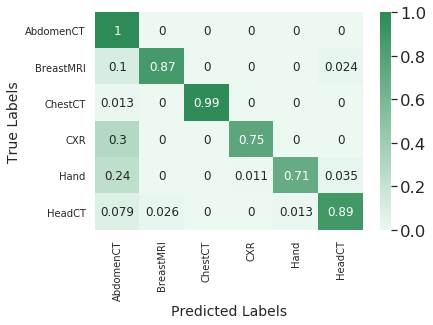

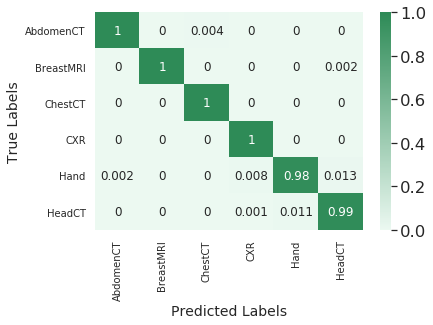

Window length h = 0.1


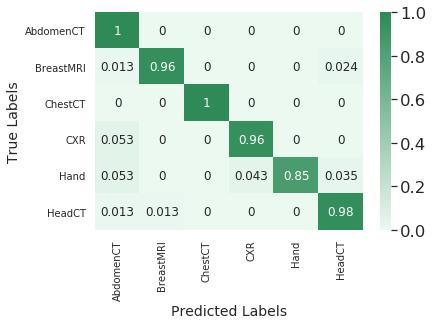

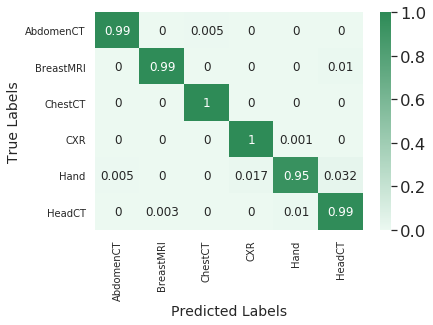

Window length h = 0.15


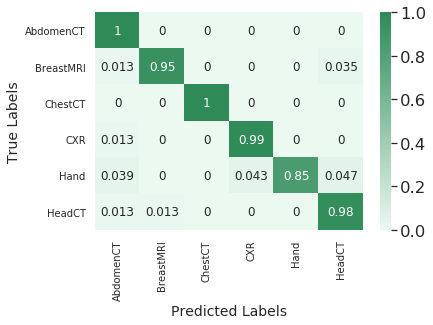

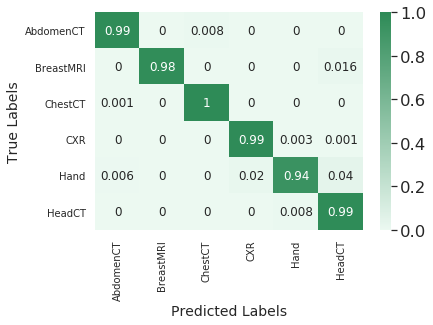

Window length h = 0.2


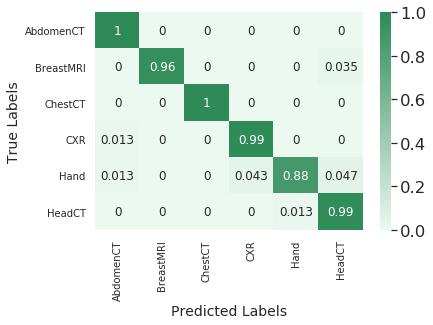

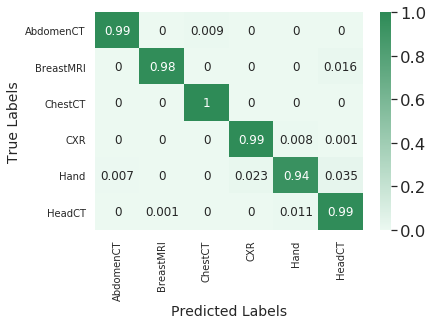

Window length h = 0.3


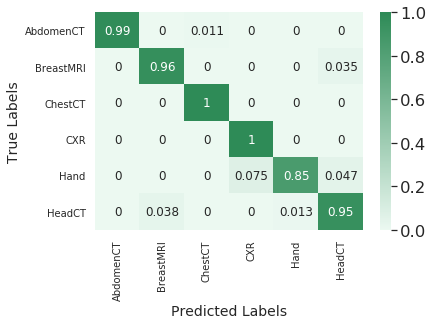

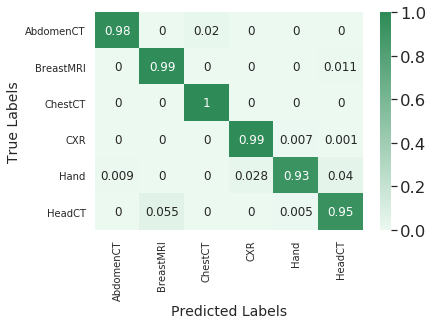

Window length h = 0.4


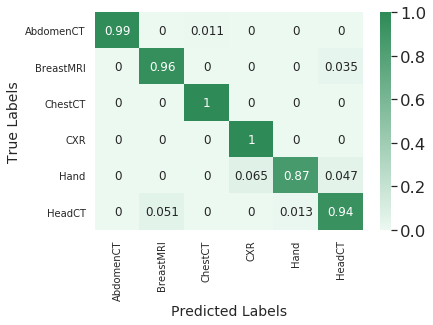

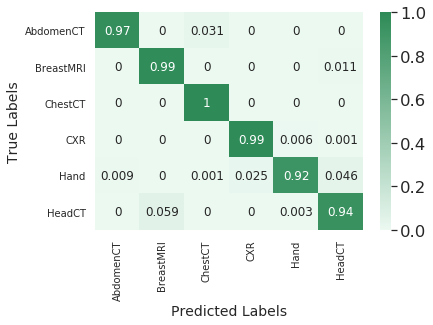

Window length h = 0.6


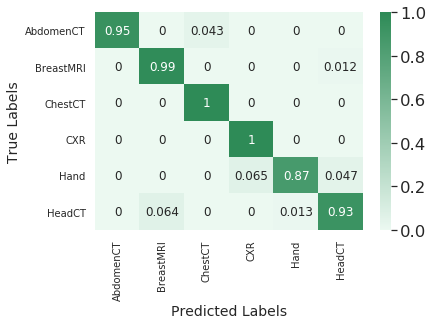

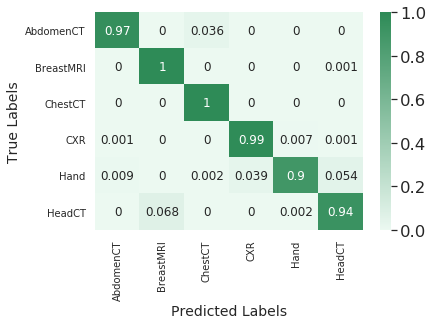

Window length h = 0.8


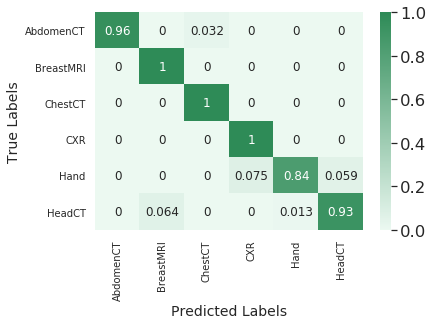

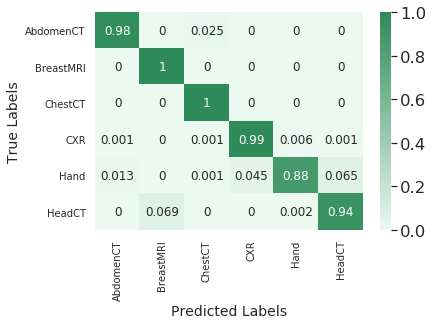

Window length h = 1


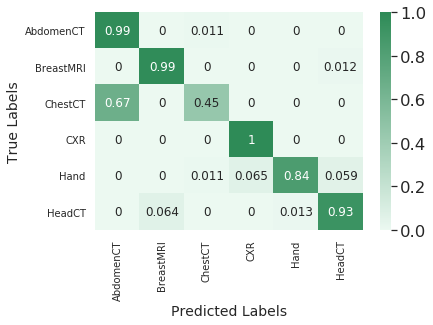

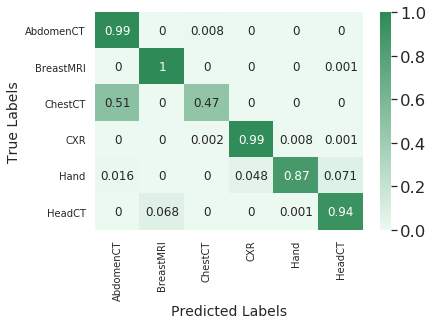

In [94]:
train_acc_list = []
valid_acc_list = [] 
for h in [0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.6, 0.8, 1]:
    print('Window length h = {}'.format(h))
    priors_parzen = getpriors(y_train_parzenBV)
    
    #Validation stats
    y_pred_valid_parzen = parzen_classify(h, X_train_parzenBV, y_train_parzenBV, X_valid_parzenBV, priors_parzen, 'hypercube')
    conf_mat_norm_parzen, stats_df_norm_parzen, macroF1_norm_parzen, accuracy_valid = performance_metrics_multiclass(y_pred_valid_parzen, y_valid_parzenBV, numcat, disp_conf = False)
    
    #Train stats
    y_pred_train_parzen = parzen_classify(h, X_train_parzenBV, y_train_parzenBV, X_train_parzenBV, priors_parzen, 'hypercube')
    conf_mat_norm_parzen, stats_df_norm_parzen, macroF1_norm_parzen, accuracy_train = performance_metrics_multiclass(y_pred_train_parzen, y_train_parzenBV, numcat, disp_conf = False)

    
    train_acc_list.append(accuracy_train)
    valid_acc_list.append(accuracy_valid)

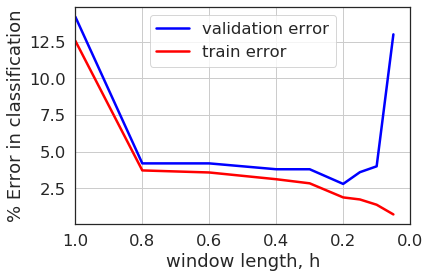

In [95]:
train_error_parzen = 1 - np.array(train_acc_list)
valid_error_parzen = 1 - np.array(valid_acc_list)
window_len = [0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.6, 0.8, 1]
plt.plot(window_len, valid_error_parzen*100, label = 'validation error', color = 'b')
plt.plot(window_len, train_error_parzen*100, label = 'train error', color = 'r')
plt.xlabel('window length, h')
plt.ylabel('% Error in classification')
ax = plt.gca()
ax.set_xlim(1, 0)  # decreasing time
# ax.set_facecolor('white')
ax.grid(b=True, which='major', linestyle='-')
sb.set_style("white")
plt.legend()

Hence we conclude that the optimal modelcapacity/ in this case its the optimal value of h is equal to 0.2 below and above which the validation error increases

## Cross Validating Parzen window
we finally need, 
1. 5 fold cross validation train and test( should be validation) accuracies.
2. confusion maatrix for 80percent train and 20 percent test data - and get per class precision recall and F1 and finally macro F1

In [156]:
def cross_validate_parzen(X_train, y_train ,k, num_gauss): 
    #data is already shuffled before so no need to do that again
    
    #Kfoldsplit is a list of k (almost) equal sized parts of the np array
    Kfoldsplit_X = np.array_split(X_train, k, axis = 0)
    Kfoldsplit_y = np.array_split(y_train, k, axis = 0)
    
    #Use test_score and train_score to store the metric you want to analyse i.e. accuracy, precision, 
    cv_train_accuracy = 0  
    cv_valid_accuracy = 0
    for i in range(k):
        #make train and validation sets
        valid_X, valid_y = Kfoldsplit_X[i], Kfoldsplit_y[i]
        train_X, train_y = np.concatenate(Kfoldsplit_X[:i]+Kfoldsplit_X[i+1:], axis = 0), np.concatenate(Kfoldsplit_y[:i]+Kfoldsplit_y[i+1:], axis = 0)
        #training phase
        priors_GMM = getpriors(train_y)
        gmm_params = get_gmm_params(train_X, train_y, num_gauss = 2, iter_max = 100, stop_thresh = 0.0001)
        
        #validation stats
        y_pred_valid_gmm = prediction_gmm(valid_X, priors_GMM, gmm_params, num_gauss = 2)
        conf_mat, stats_df, macroF1, accuracy_valid = performance_metrics_multiclass(y_pred_valid_gmm, valid_y, numcat)

        #train stats
        y_pred_train_gmm = prediction_gmm(train_X, priors_GMM, gmm_params, num_gauss = 2)
        conf_mat, stats_df, macroF1, accuracy_train = performance_metrics_multiclass(y_pred_train_gmm, train_y, numcat)
        
        cv_train_accuracy += accuracy_train   
        cv_valid_accuracy += accuracy_valid
    print('Cross Validation train accuracy = {}, test accuracy = {}'.format(cv_train_accuracy/k, cv_valid_accuracy/k))        
    return cv_train_accuracy/k, cv_valid_accuracy/k

In [ ]:
h = 0.5
priors_parzen = getpriors(y_train_parzen)
y_pred_test_parzen = parzen_classify(h, X_train_parzen, y_train_parzen, X_test_parzen, priors_parzen, 'hypercube')
conf_mat_norm_parzen, stats_df_norm_parzen, macroF1_norm_parzen, accuracy_norm_parzen = performance_metrics_multiclass(y_pred_test_parzen, y_test_parzen, numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_parzen, accuracy_norm_parzen))
stats_df_norm_parzen

cross_validate_gmmbayes(X_train_parzen, y_train_parzen, 5, h)

# Testing Parzen

In [ ]:
h = 0.5
priors_parzen = getpriors(y_train_parzen)
y_pred_test_parzen = parzen_classify(h, X_train_parzen, y_train_parzen, X_test_parzen, priors_parzen, 'hypercube')
conf_mat_norm_parzen, stats_df_norm_parzen, macroF1_norm_parzen, accuracy_norm_parzen = performance_metrics_multiclass(y_pred_test_parzen, y_test_parzen, numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_parzen, accuracy_norm_parzen))
stats_df_norm_parzen

### Parzen Window experiments

# KNN

In [566]:
def get_dist(x1, X):
    
    return np.linalg.norm((x1.reshape(1, X.shape[1])-X), axis = 1)

    
def knn_classify(k, X_train, y_train, X_test, priors):
    y_pred_test = np.zeros((X_test.shape[0],))
    for i in range(X_test.shape[0]):
        dist = get_dist(X_test[i], X_train)
        assert(dist.shape == (X_train.shape[0],))
        argsort_dist = np.argsort(dist, axis = 0)
        y_train_sorted_firstk = y_train[argsort_dist][0:k]
        y_unique, counts = np.unique(y_train_sorted_firstk, return_counts=True)
#         print(counts.shape, np.array(priors).shape)
#         print(counts)
#         print(y_unique)
#         assert(counts.shape==np.array(priors).shape==(numcat,))
        post = np.ones(counts.shape[0])
        maxpost = 0
        for j in range(counts.shape[0]):
            post[j] *= priors[y_unique[j]] * counts[j]
            if(post[j] >= maxpost):
                maxpost = post[j]
                y_pred_test[i] = y_unique[j]
        
    return y_pred_test

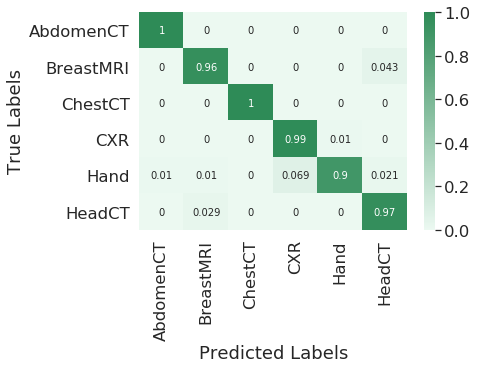

Macro F1 = 0.9683543690473009, Accuracy = 0.967741935483871


class  Precision    Recall        F1
0  AbdomenCT   0.969697  0.979592  0.974619
1  BreastMRI   0.953271  1.000000  0.976077
2    ChestCT   0.978022  1.000000  0.988889
3        CXR   0.942857  0.980198  0.961165
4       Hand   1.000000  0.876190  0.934010
5     HeadCT   0.936842  0.946809  0.941799

In [567]:
k = 3
priors_knn = getpriors(y_train_parzen)
y_pred_test_knn = knn_classify(k, X_train_parzen, y_train_parzen, X_test_parzen, priors_knn)
conf_mat_norm_knn, stats_df_norm_knn, macroF1_norm_knn, accuracy_norm_knn = performance_metrics_multiclass(y_pred_test_knn, y_test_parzen, numcat)
print('Macro F1 = {}, Accuracy = {}'.format(macroF1_norm_knn, accuracy_norm_knn))
stats_df_norm_parzen

# Linear Models
### Logistic classifier, Linear(?) classifier - L2,L1,Elastic Net
### GLM ie Logistic with sigma(phi(W.TX))- Different Kernels, L2,L1, Elastic